<a href="https://colab.research.google.com/github/alessandrotofani/Tesi_magistrale/blob/master/6_Fed_iid_check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --quiet fastai==2.2.5

In [ ]:
import sys 
sys.path.append('/content/drive/MyDrive/Tesi_magistrale/Tesi_magistrale')
import mf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tesi_magistrale/Dataset/IEEE/Output/data.csv')
data = mf.new_processing(data)
# data = pd.get_dummies(data)
feature_names = mf.get_col(data)

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
dataset = {}
clients = 4
for i in range(clients):
  subset = 'train_data_'+str(i+1)
  dataset[i] = mf.get_set(subset, data, 'MLP', merged=True)

In [ ]:
dataset[0]

isFraud  TransactionDT  TransactionAmt  ...  screen_h       day      hour
175143      0.0       0.235772        0.003656  ...       0.0  0.000000  0.913043
223931      0.0       0.329843        0.013298  ...       0.0  0.666667  0.000000
246421      0.0       0.367369        0.000306  ...       0.0  0.500000  0.869565
55445       0.0       0.076453        0.001386  ...       0.0  1.000000  0.913043
248191      0.0       0.370450        0.001840  ...       0.0  0.666667  0.434783
...         ...            ...             ...  ...       ...       ...       ...
177395      0.0       0.240507        0.001807  ...       0.0  0.166667  0.782609
317144      0.0       0.497398        0.002621  ...       0.0  1.000000  0.521739
237130      0.0       0.350848        0.016431  ...       0.0  0.000000  0.869565
325594      0.0       0.505037        0.007411  ...       0.0  0.000000  0.913043
157918      0.0       0.203423        0.005346  ...       0.0  0.333333  0.000000

[90140 rows x 211 columns]

In [ ]:
def get_numerical_col(data, categorical_col):
  numerical_col = []
  for col in data.columns:
    if col not in categorical_col and col != 'isFraud':
      numerical_col.append(col)
  return numerical_col

categorical_col = dataset[0].select_dtypes(include=['object']).columns.tolist()
numerical_col = get_numerical_col(dataset[0], categorical_col)

In [ ]:
len(numerical_col) + len(categorical_col) == dataset[0].shape[1] - 1

True

*************************
Feature ProductCD
Dataset 0


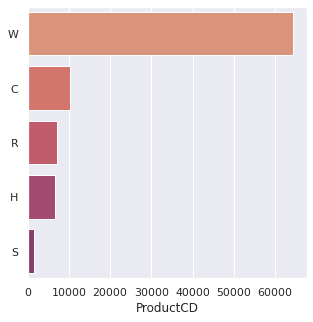

Dataset 1


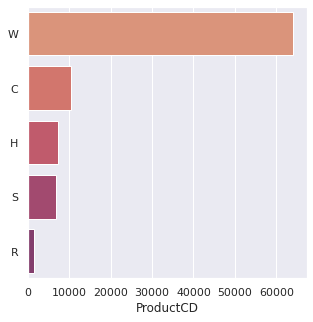

Dataset 2


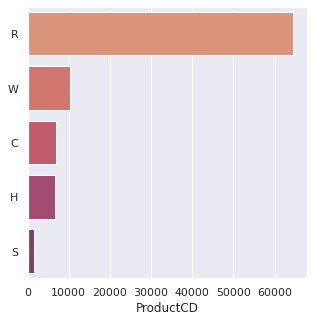

Dataset 3


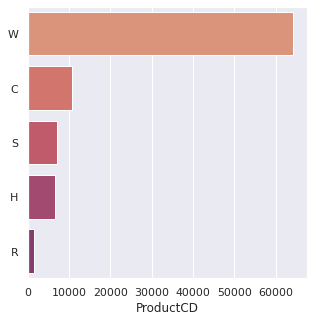

*************************
*************************
Feature card4
Dataset 0


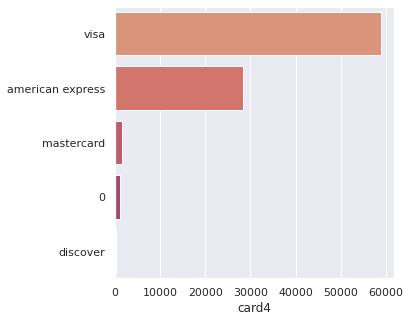

Dataset 1


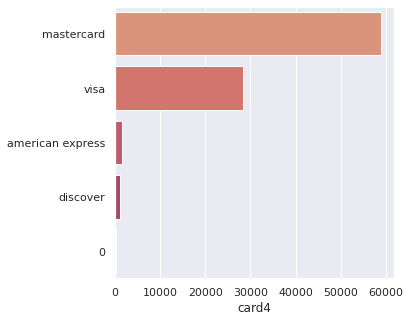

Dataset 2


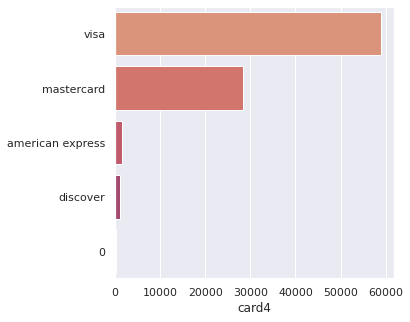

Dataset 3


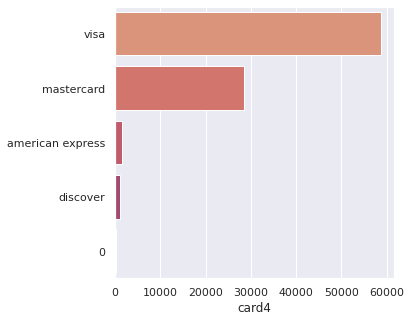

*************************
*************************
Feature card6
Dataset 0


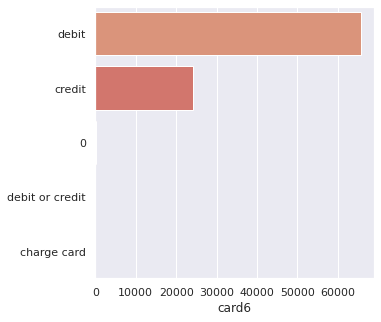

Dataset 1


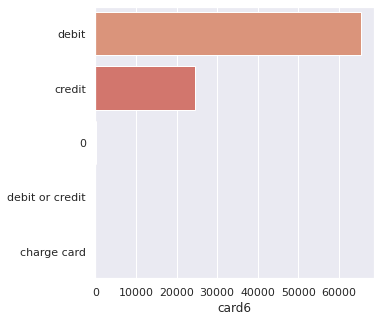

Dataset 2


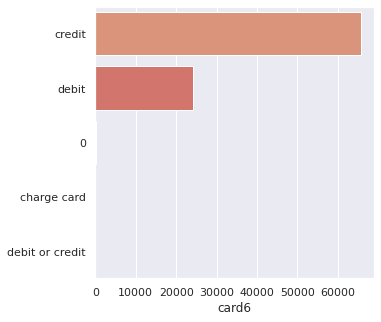

Dataset 3


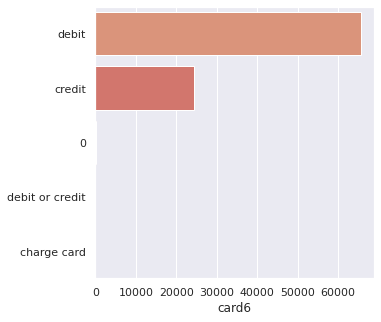

*************************
*************************
Feature P_emaildomain
Dataset 0


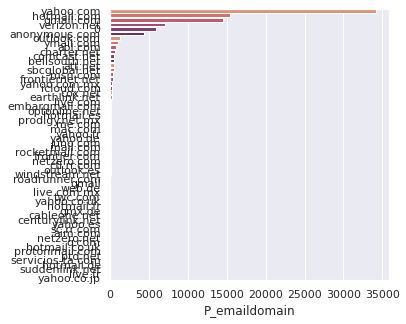

Dataset 1


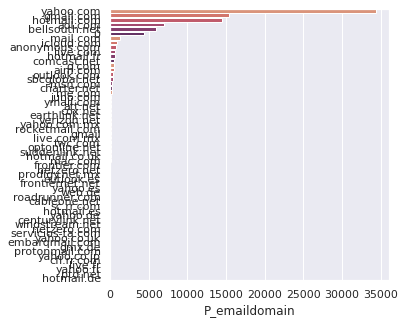

Dataset 2


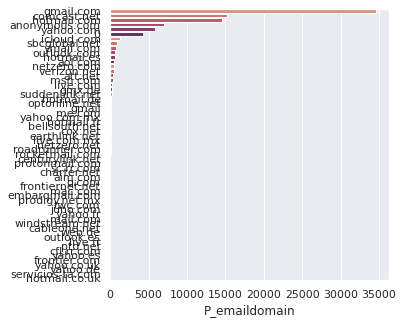

Dataset 3


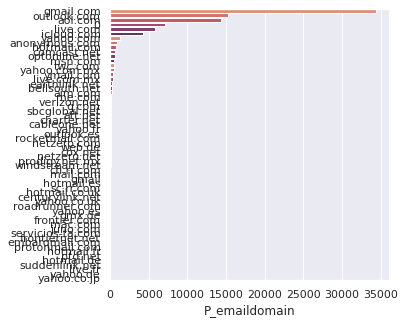

*************************
*************************
Feature R_emaildomain
Dataset 0


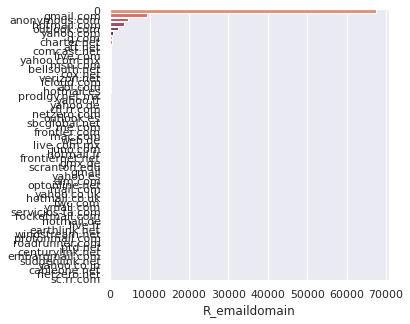

Dataset 1


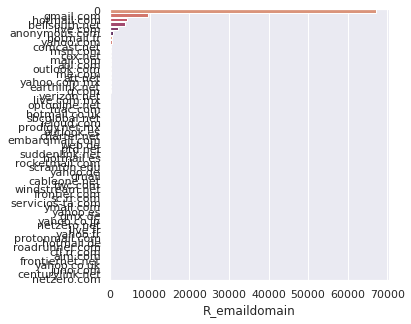

Dataset 2


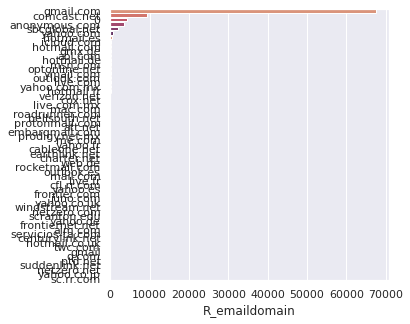

Dataset 3


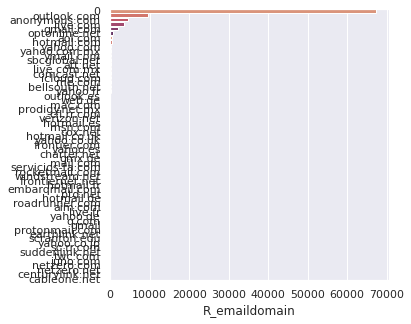

*************************
*************************
Feature M2
Dataset 0


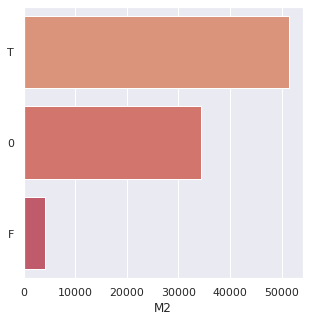

Dataset 1


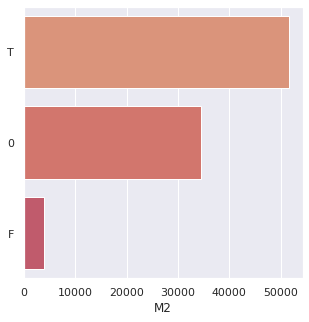

Dataset 2


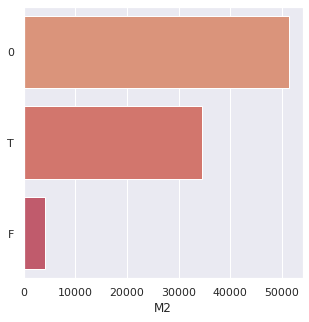

Dataset 3


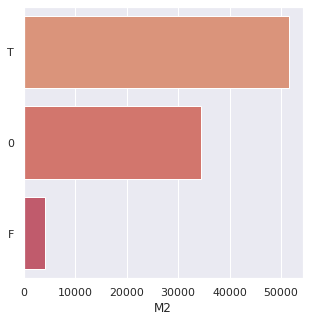

*************************
*************************
Feature M3
Dataset 0


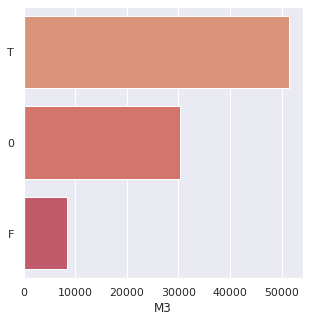

Dataset 1


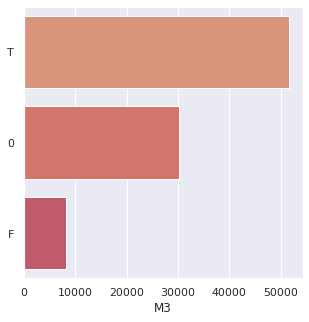

Dataset 2


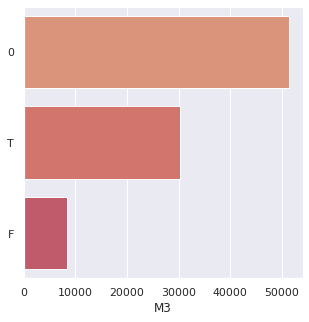

Dataset 3


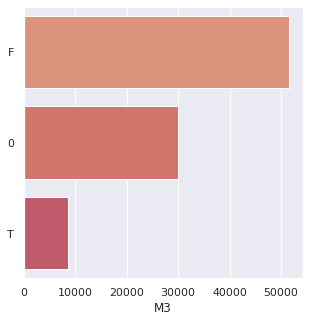

*************************
*************************
Feature M4
Dataset 0


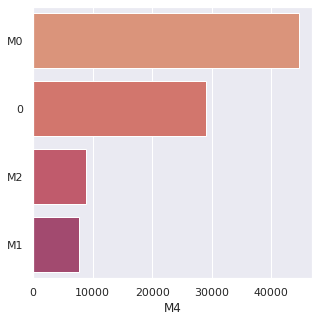

Dataset 1


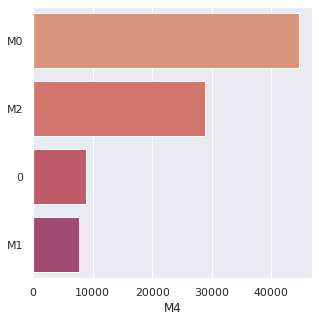

Dataset 2


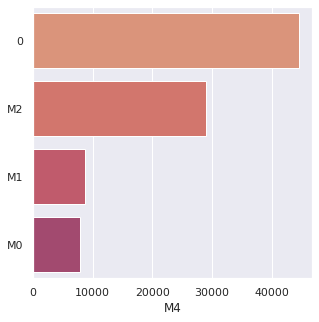

Dataset 3


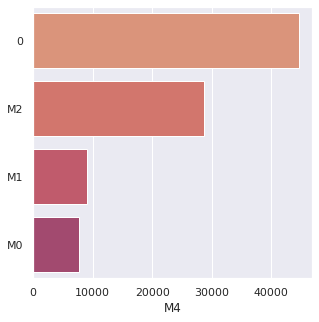

*************************
*************************
Feature M5
Dataset 0


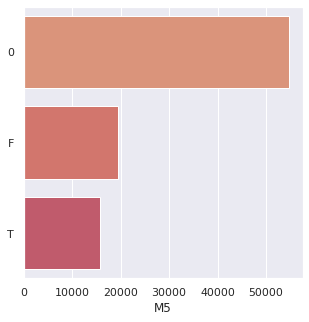

Dataset 1


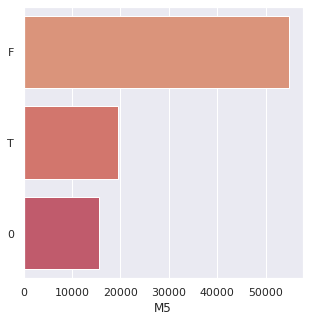

Dataset 2


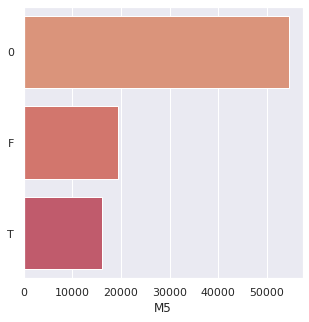

Dataset 3


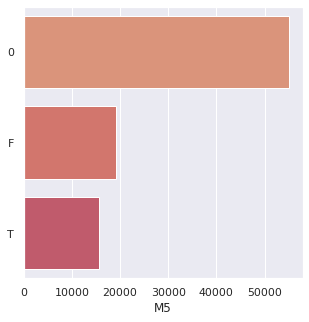

*************************
*************************
Feature M6
Dataset 0


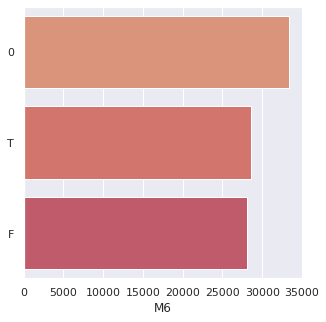

Dataset 1


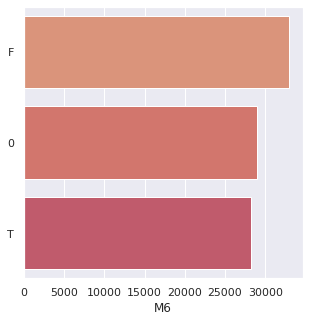

Dataset 2


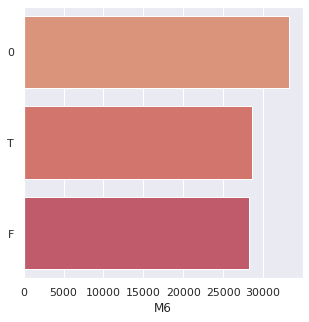

Dataset 3


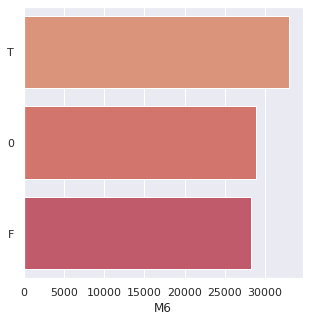

*************************
*************************
Feature M7
Dataset 0


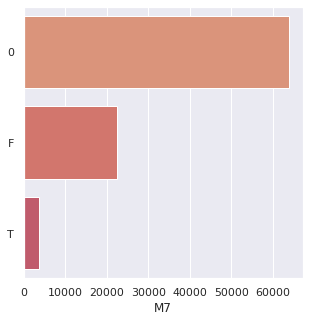

Dataset 1


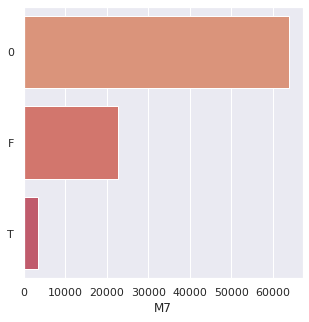

Dataset 2


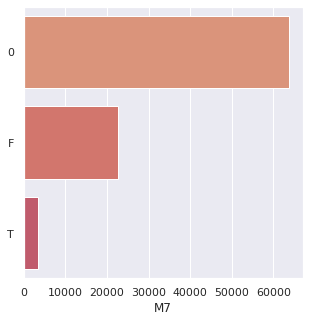

Dataset 3


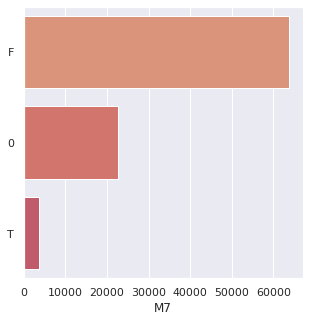

*************************
*************************
Feature M8
Dataset 0


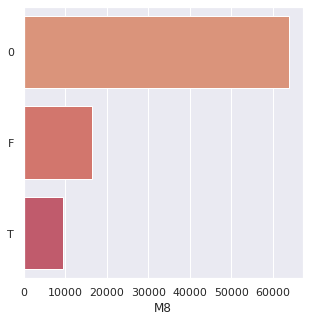

Dataset 1


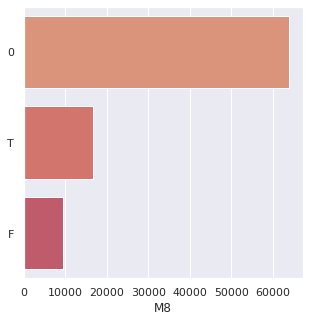

Dataset 2


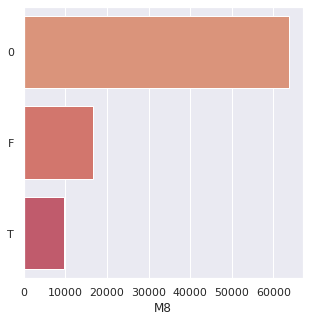

Dataset 3


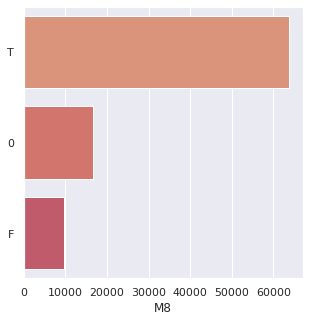

*************************
*************************
Feature M9
Dataset 0


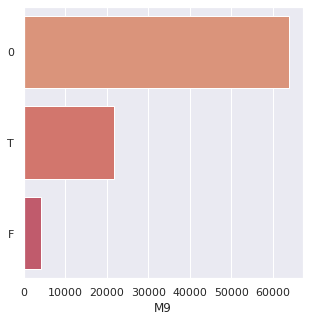

Dataset 1


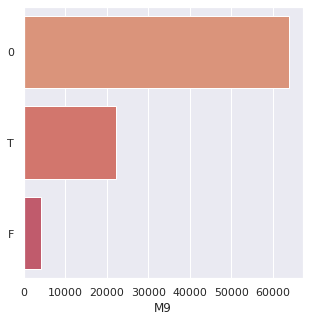

Dataset 2


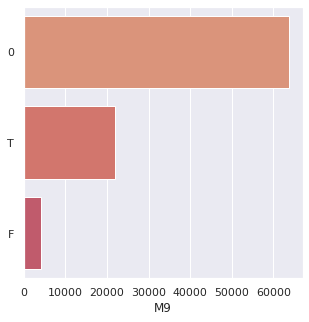

Dataset 3


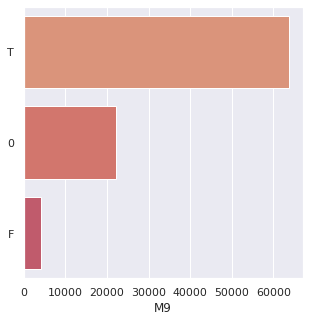

*************************
*************************
Feature id_12
Dataset 0


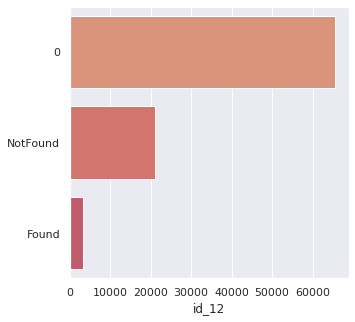

Dataset 1


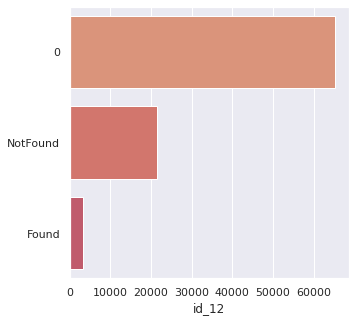

Dataset 2


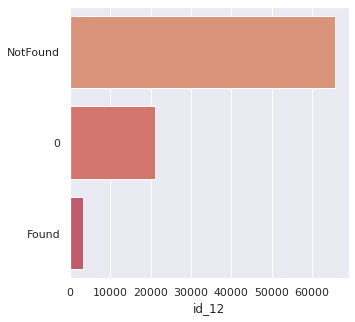

Dataset 3


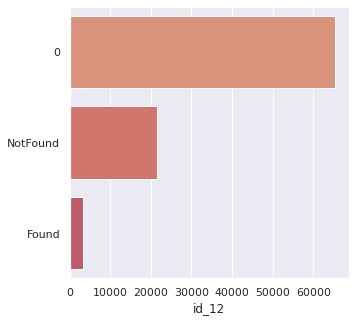

*************************
*************************
Feature id_15
Dataset 0


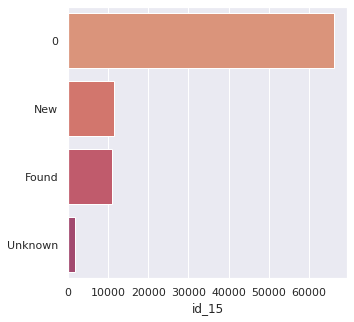

Dataset 1


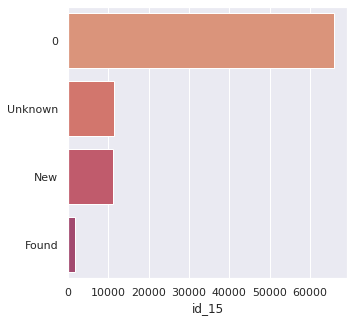

Dataset 2


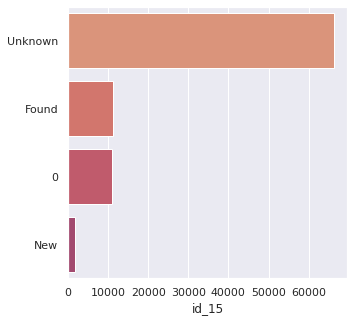

Dataset 3


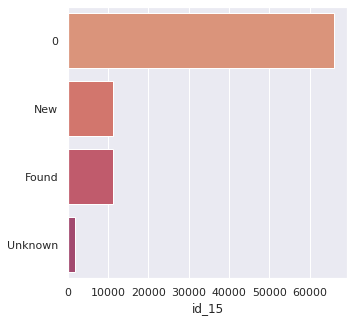

*************************
*************************
Feature id_16
Dataset 0


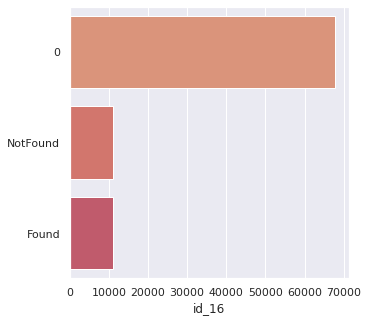

Dataset 1


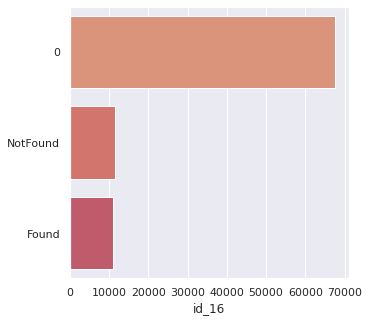

Dataset 2


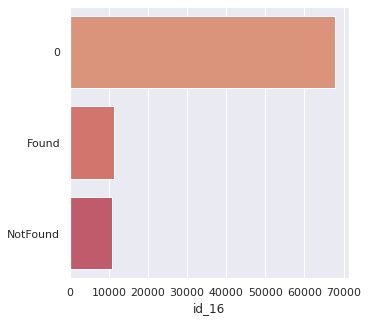

Dataset 3


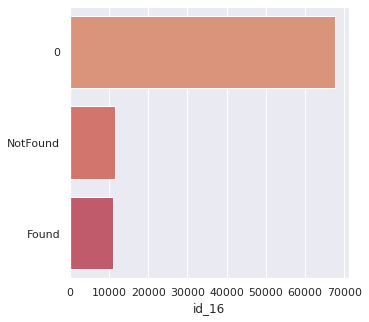

*************************
*************************
Feature id_27
Dataset 0


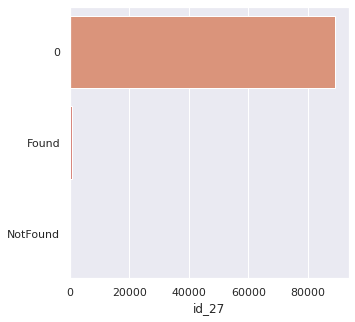

Dataset 1


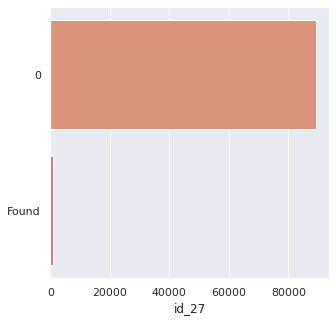

Dataset 2


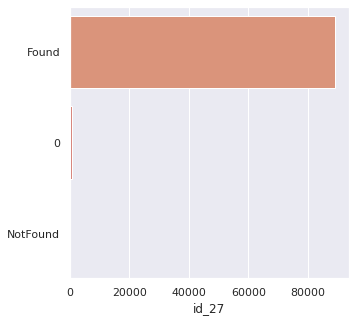

Dataset 3


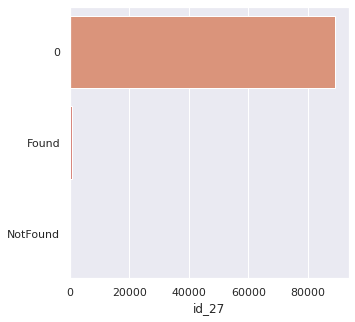

*************************
*************************
Feature id_28
Dataset 0


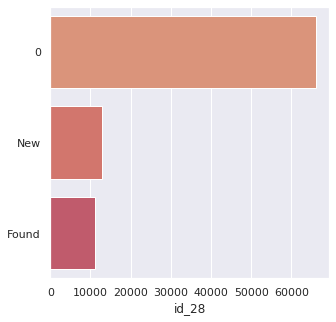

Dataset 1


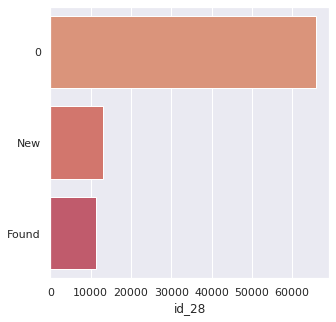

Dataset 2


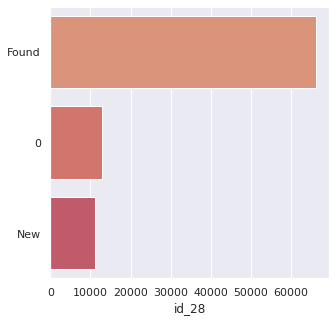

Dataset 3


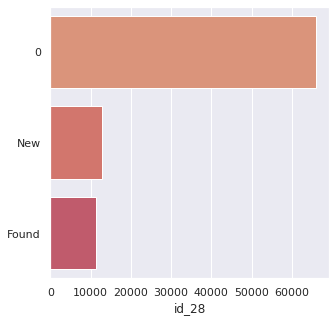

*************************
*************************
Feature id_29
Dataset 0


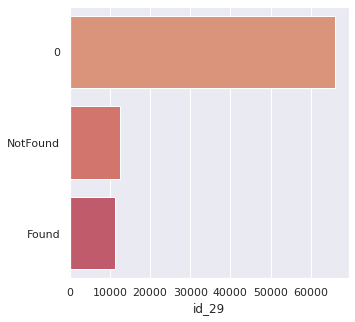

Dataset 1


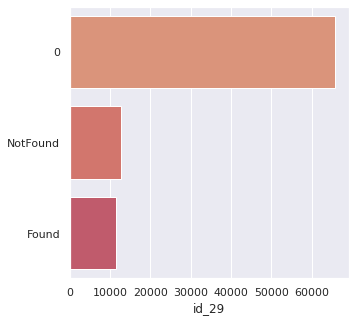

Dataset 2


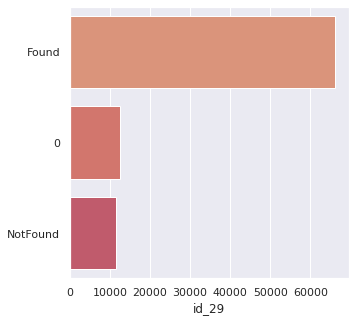

Dataset 3


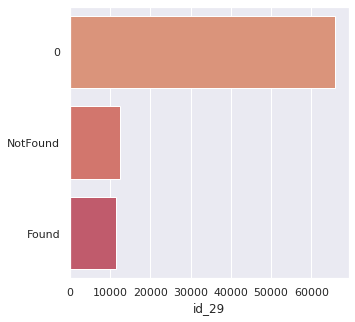

*************************
*************************
Feature id_35
Dataset 0


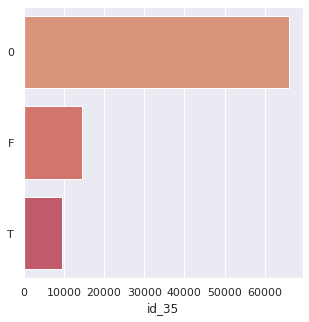

Dataset 1


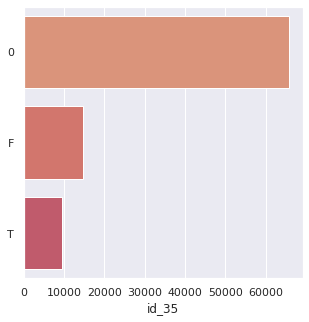

Dataset 2


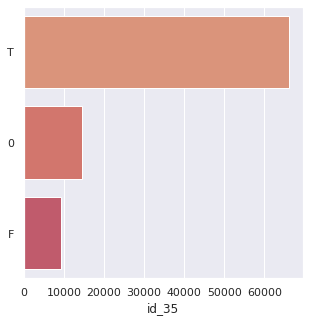

Dataset 3


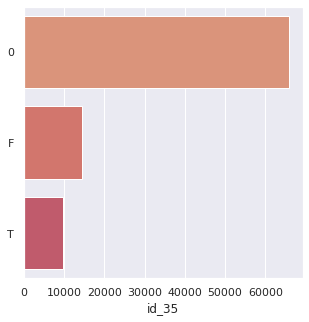

*************************
*************************
Feature id_36
Dataset 0


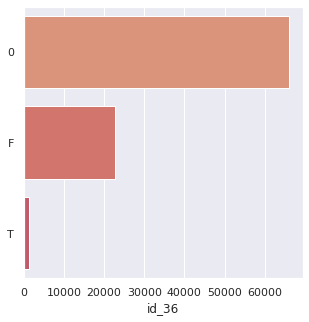

Dataset 1


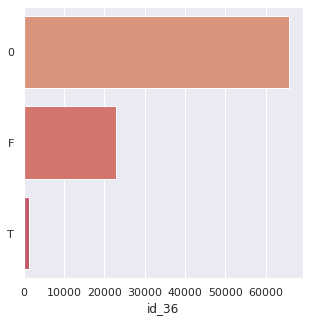

Dataset 2


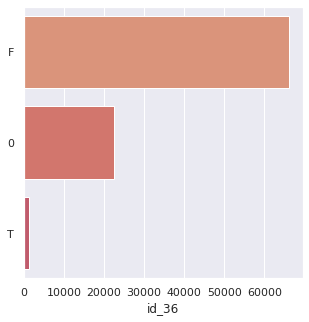

Dataset 3


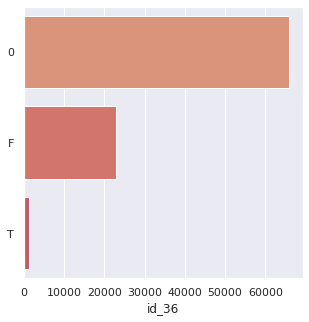

*************************
*************************
Feature id_37
Dataset 0


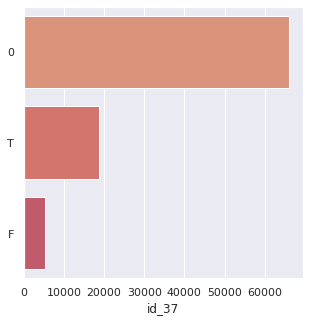

Dataset 1


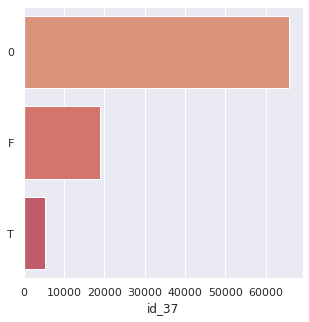

Dataset 2


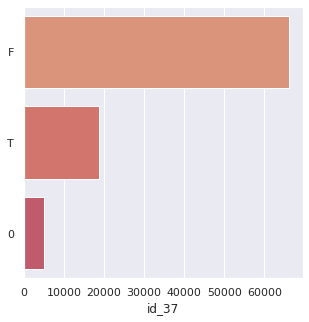

Dataset 3


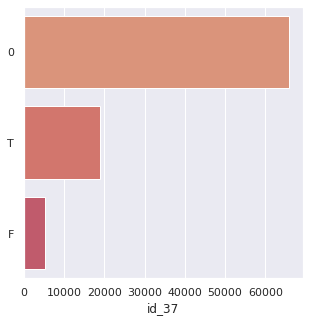

*************************
*************************
Feature id_38
Dataset 0


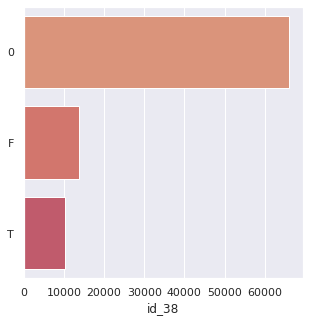

Dataset 1


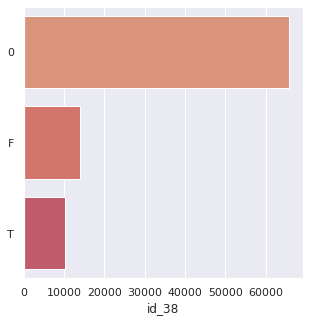

Dataset 2


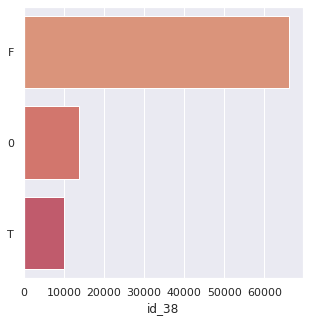

Dataset 3


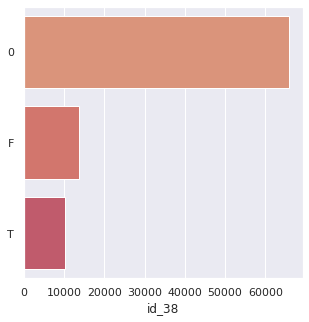

*************************
*************************
Feature DeviceType
Dataset 0


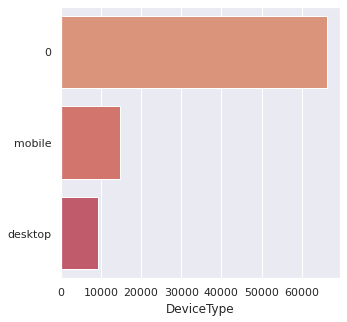

Dataset 1


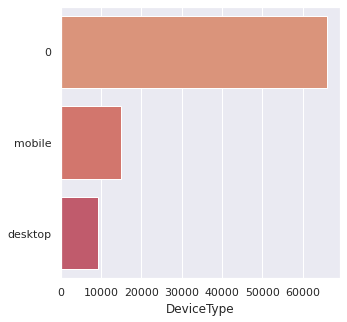

Dataset 2


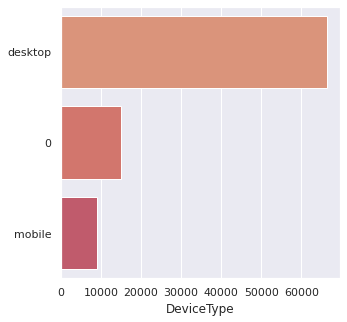

Dataset 3


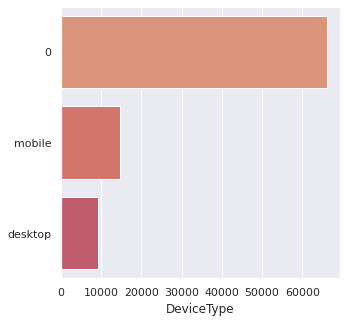

*************************
*************************
Feature device_name
Dataset 0


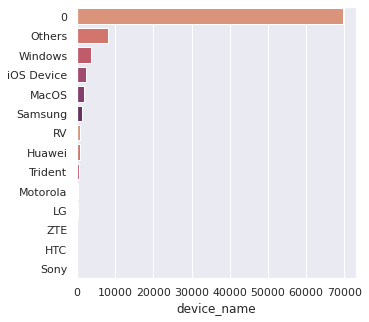

Dataset 1


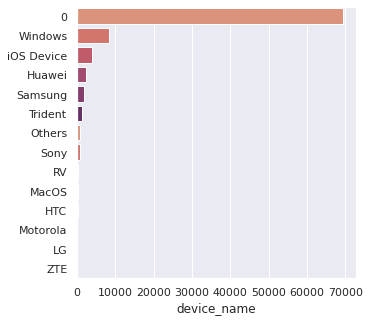

Dataset 2


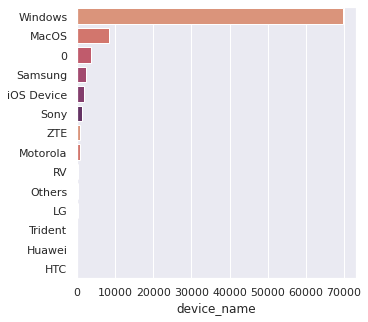

Dataset 3


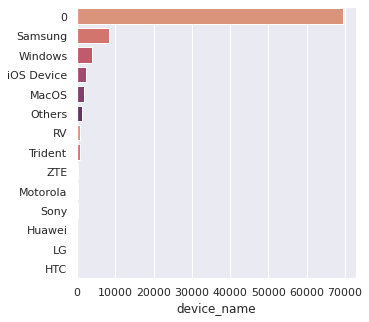

*************************
*************************
Feature device_version
Dataset 0


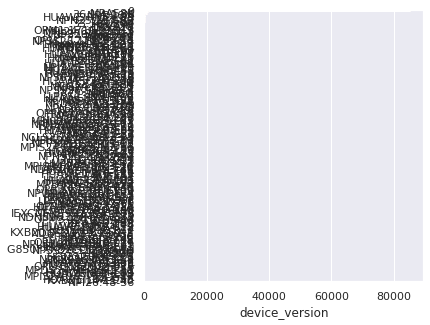

Dataset 1


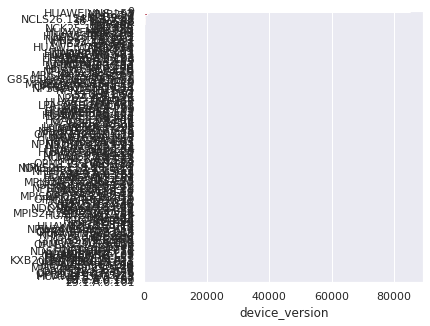

Dataset 2


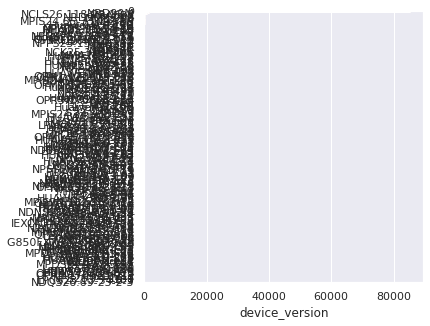

Dataset 3


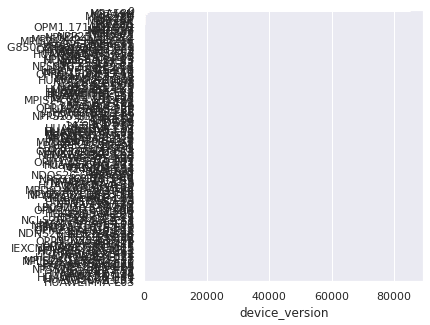

*************************
*************************
Feature os_name
Dataset 0


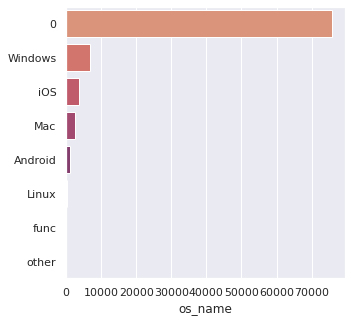

Dataset 1


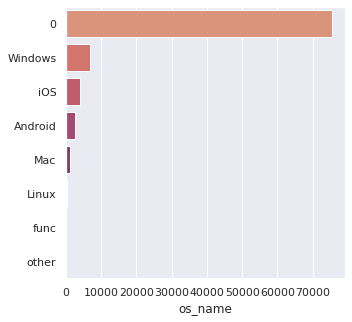

Dataset 2


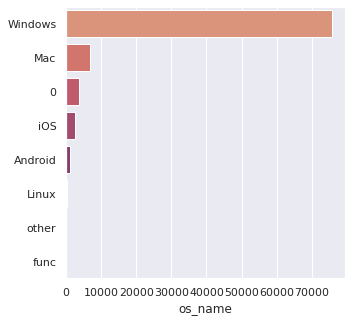

Dataset 3


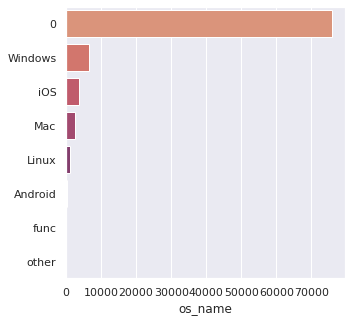

*************************
*************************
Feature browser_name
Dataset 0


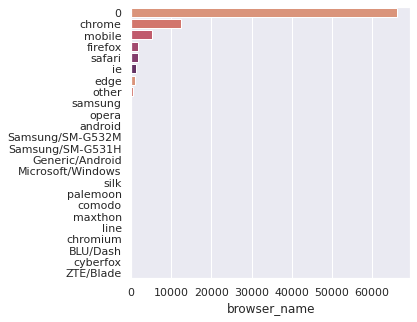

Dataset 1


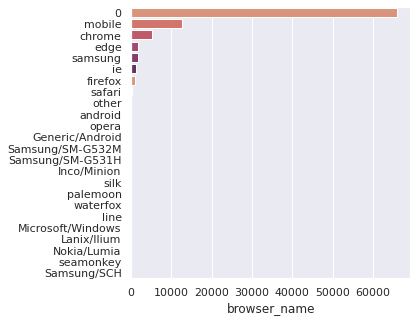

Dataset 2


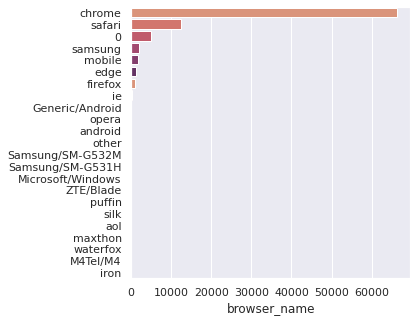

Dataset 3


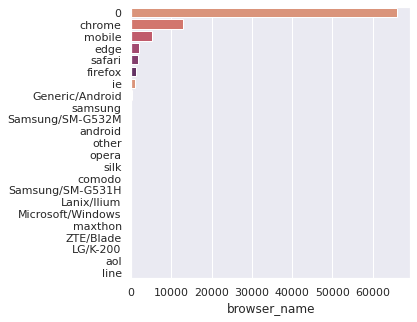

*************************


In [ ]:
counter = 0
plt.rcParams.update({'figure.max_open_warning': 0})
for col in categorical_col:
  print('*************************')
  print('Feature', col)
  for i in dataset:
    print('Dataset', i+1)
    x = dataset[i][col].unique()
    y = dataset[i][col].value_counts()
    plt.figure(counter)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.barplot(x=y, y=x, palette=sns.color_palette("flare"))
    plt.show()
    counter += 1
  print('*************************')

Dataset 0


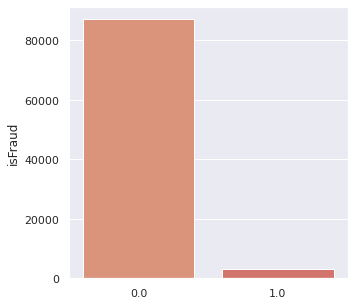

Dataset 1


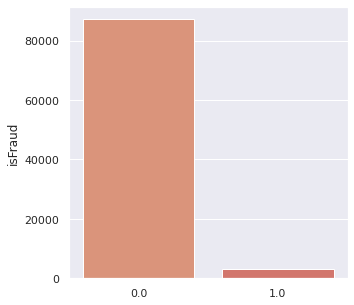

Dataset 2


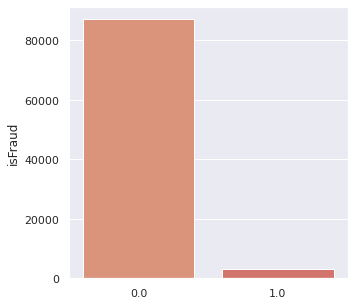

Dataset 3


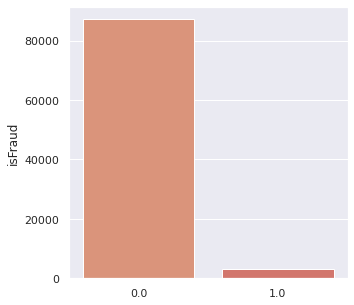

In [ ]:
col = 'isFraud'
for i in dataset:
  print('Dataset', i+1)
  x = dataset[i][col].unique()
  y = dataset[i][col].value_counts()
  plt.figure(i)
  sns.set(rc={'figure.figsize':(5,5)})
  sns.barplot(x=x, y=y, palette=sns.color_palette("flare"))
  plt.show()

*****************
*****************
Feature TransactionDT
Dataset 0


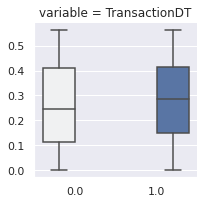

Dataset 1


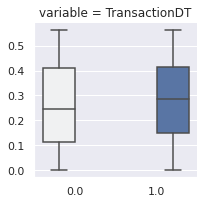

Dataset 2


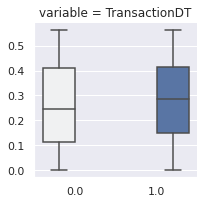

Dataset 3


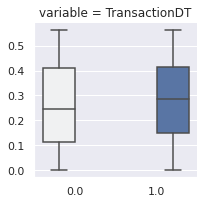

*****************
*****************
Feature TransactionAmt
Dataset 0


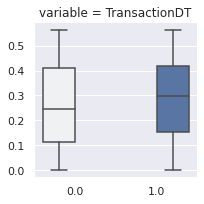

Dataset 1


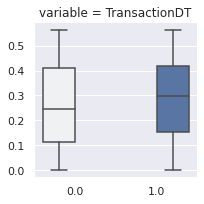

Dataset 2


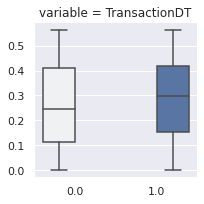

Dataset 3


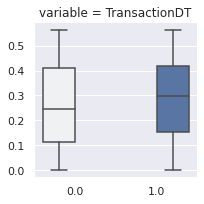

*****************
*****************
Feature card1
Dataset 0


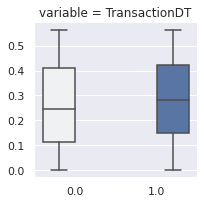

Dataset 1


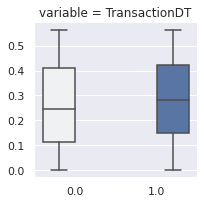

Dataset 2


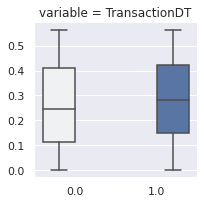

Dataset 3


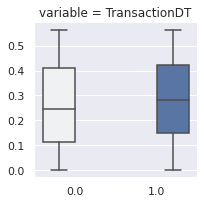

*****************
*****************
Feature card2
Dataset 0


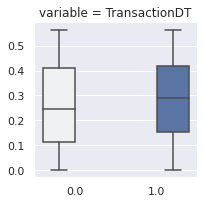

Dataset 1


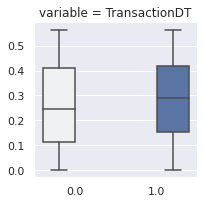

Dataset 2


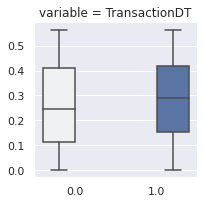

Dataset 3


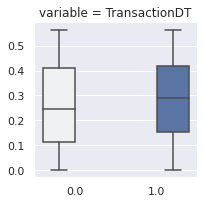

*****************
*****************
Feature card3
Dataset 0


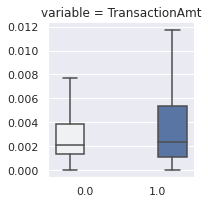

Dataset 1


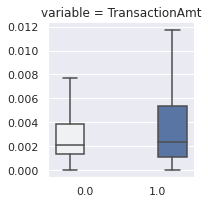

Dataset 2


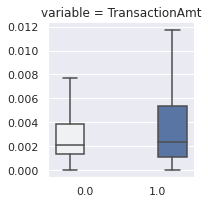

Dataset 3


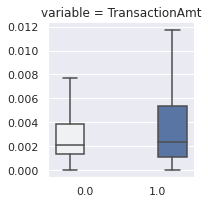

*****************
*****************
Feature card5
Dataset 0


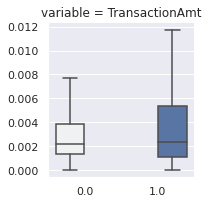

Dataset 1


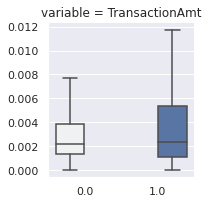

Dataset 2


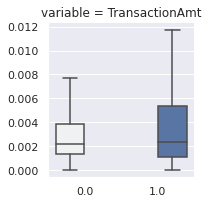

Dataset 3


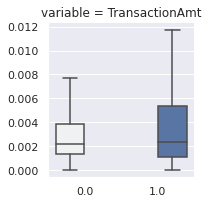

*****************
*****************
Feature addr1
Dataset 0


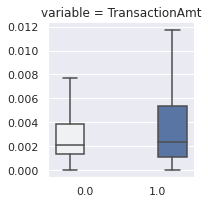

Dataset 1


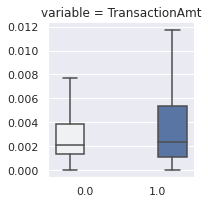

Dataset 2


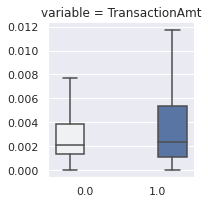

Dataset 3


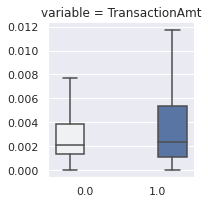

*****************
*****************
Feature addr2
Dataset 0


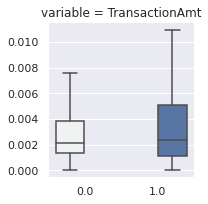

Dataset 1


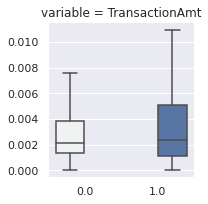

Dataset 2


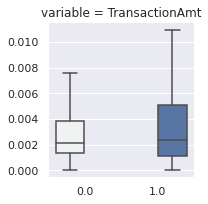

Dataset 3


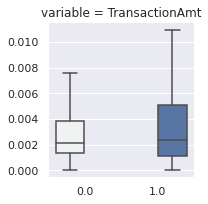

*****************
*****************
Feature C1
Dataset 0


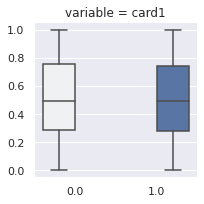

Dataset 1


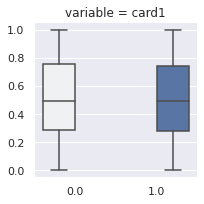

Dataset 2


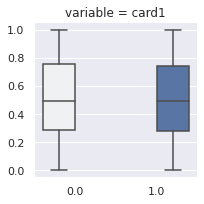

Dataset 3


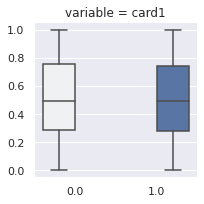

*****************
*****************
Feature C2
Dataset 0


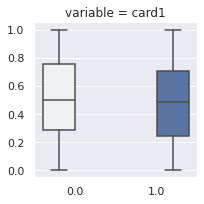

Dataset 1


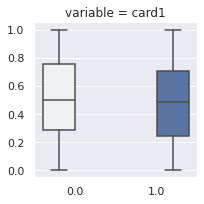

Dataset 2


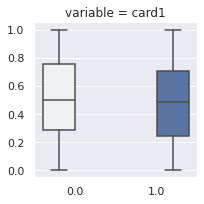

Dataset 3


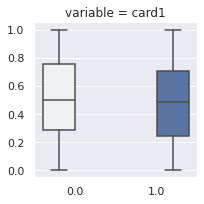

*****************
*****************
Feature C3
Dataset 0


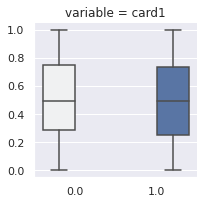

Dataset 1


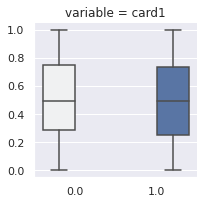

Dataset 2


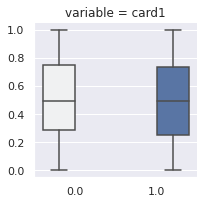

Dataset 3


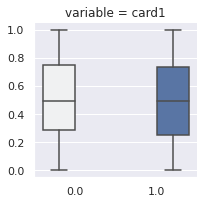

*****************
*****************
Feature C4
Dataset 0


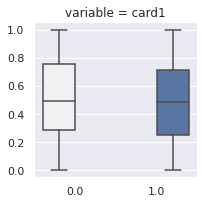

Dataset 1


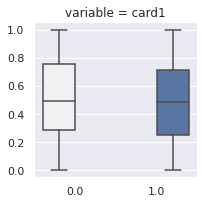

Dataset 2


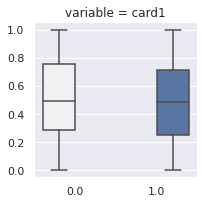

Dataset 3


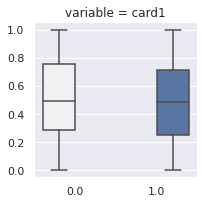

*****************
*****************
Feature C5
Dataset 0


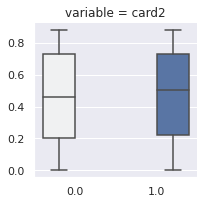

Dataset 1


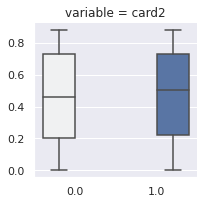

Dataset 2


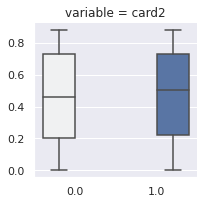

Dataset 3


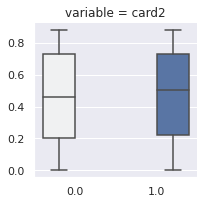

*****************
*****************
Feature C6
Dataset 0


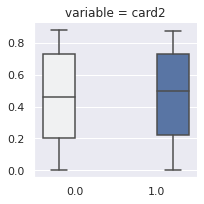

Dataset 1


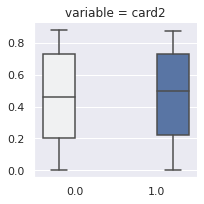

Dataset 2


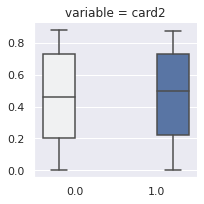

Dataset 3


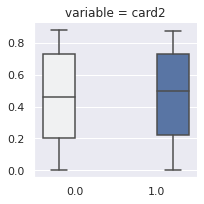

*****************
*****************
Feature C7
Dataset 0


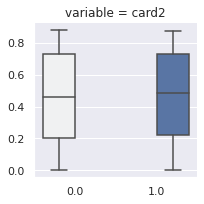

Dataset 1


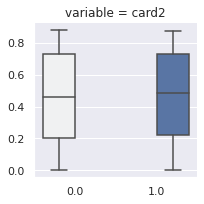

Dataset 2


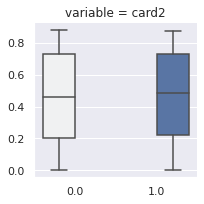

Dataset 3


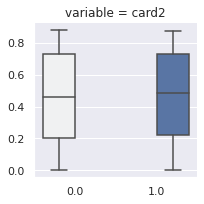

*****************
*****************
Feature C8
Dataset 0


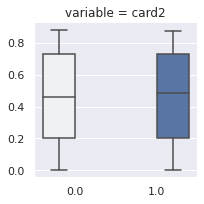

Dataset 1


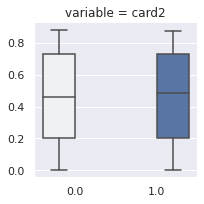

Dataset 2


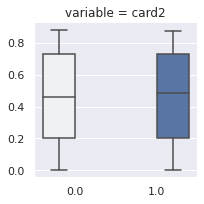

Dataset 3


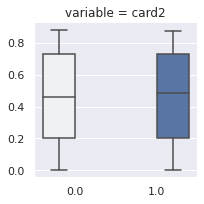

*****************
*****************
Feature C9
Dataset 0


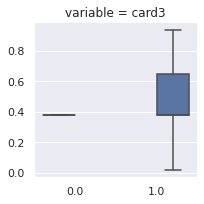

Dataset 1


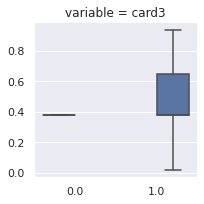

Dataset 2


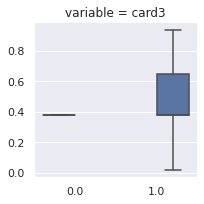

Dataset 3


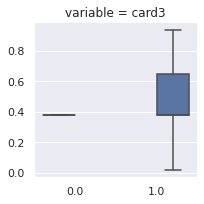

*****************
*****************
Feature C10
Dataset 0


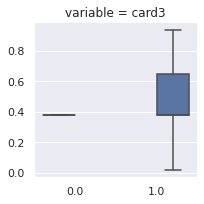

Dataset 1


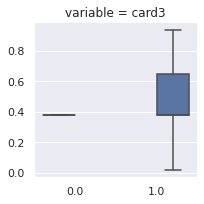

Dataset 2


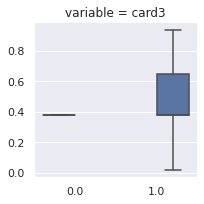

Dataset 3


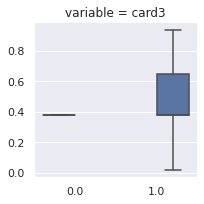

*****************
*****************
Feature C11
Dataset 0


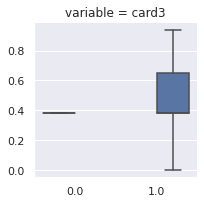

Dataset 1


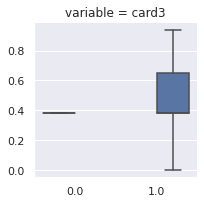

Dataset 2


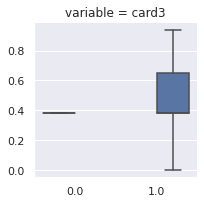

Dataset 3


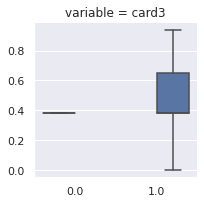

*****************
*****************
Feature C12
Dataset 0


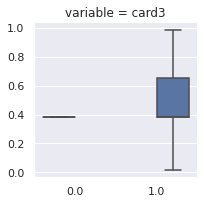

Dataset 1


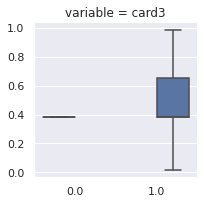

Dataset 2


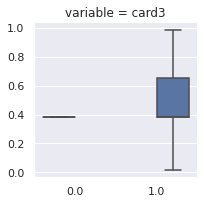

Dataset 3


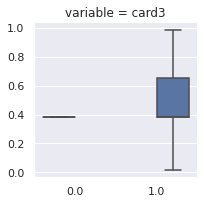

*****************
*****************
Feature C13
Dataset 0


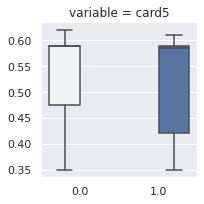

Dataset 1


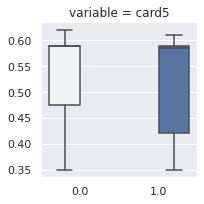

Dataset 2


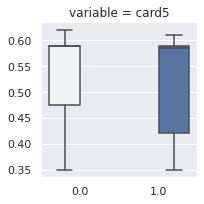

Dataset 3


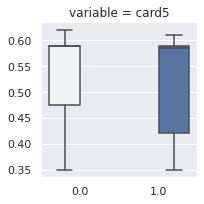

*****************
*****************
Feature C14
Dataset 0


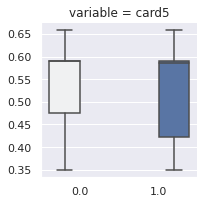

Dataset 1


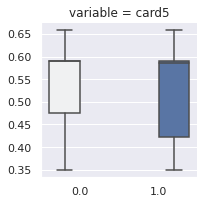

Dataset 2


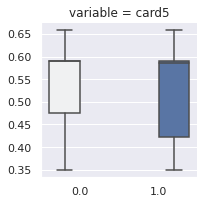

Dataset 3


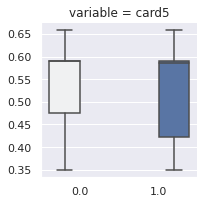

*****************
*****************
Feature D1
Dataset 0


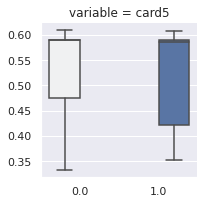

Dataset 1


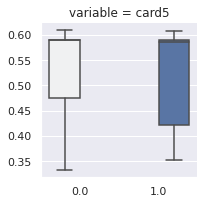

Dataset 2


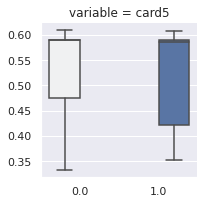

Dataset 3


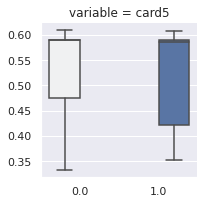

*****************
*****************
Feature D10
Dataset 0


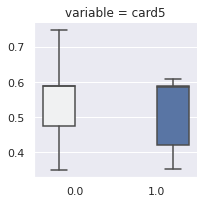

Dataset 1


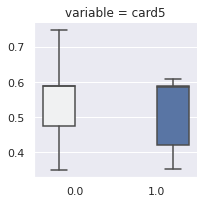

Dataset 2


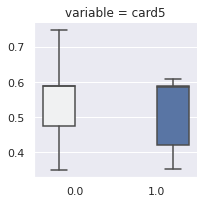

Dataset 3


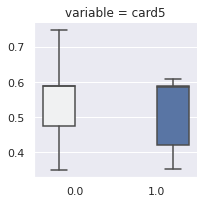

*****************
*****************
Feature D15
Dataset 0


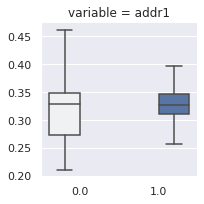

Dataset 1


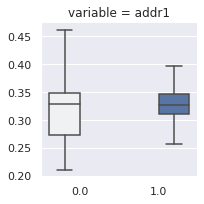

Dataset 2


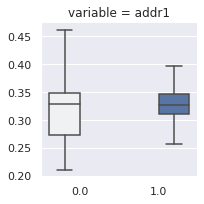

Dataset 3


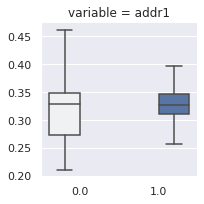

*****************
*****************
Feature V12
Dataset 0


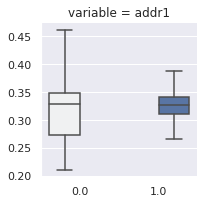

Dataset 1


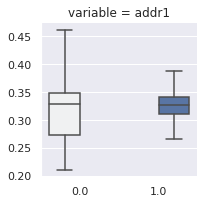

Dataset 2


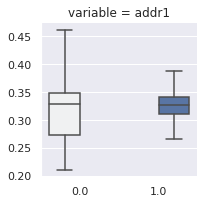

Dataset 3


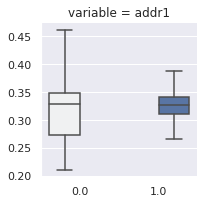

*****************
*****************
Feature V13
Dataset 0


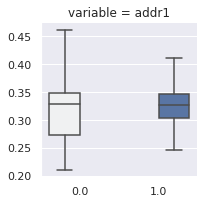

Dataset 1


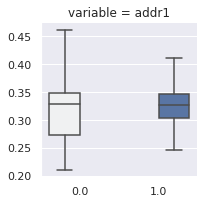

Dataset 2


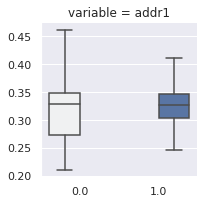

Dataset 3


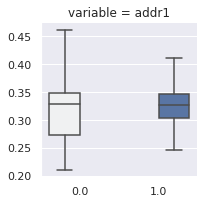

*****************
*****************
Feature V14
Dataset 0


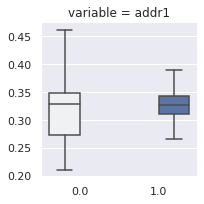

Dataset 1


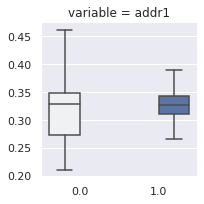

Dataset 2


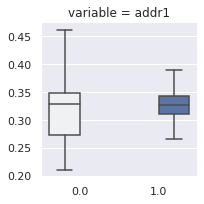

Dataset 3


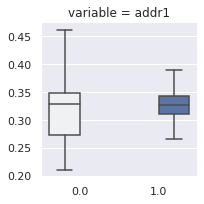

*****************
*****************
Feature V15
Dataset 0


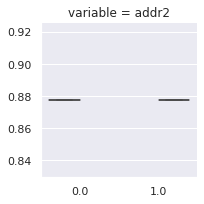

Dataset 1


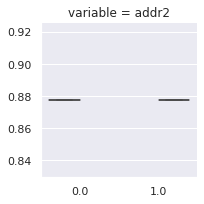

Dataset 2


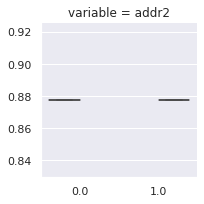

Dataset 3


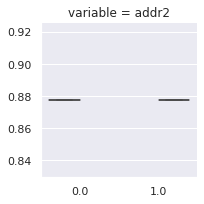

*****************
*****************
Feature V16
Dataset 0


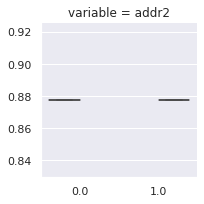

Dataset 1


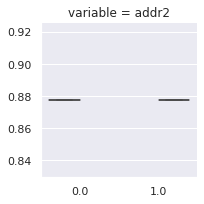

Dataset 2


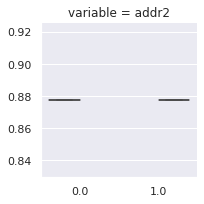

Dataset 3


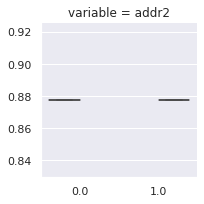

*****************
*****************
Feature V17
Dataset 0


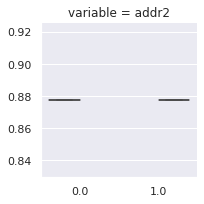

Dataset 1


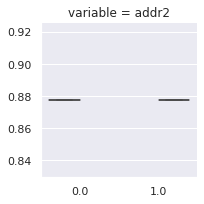

Dataset 2


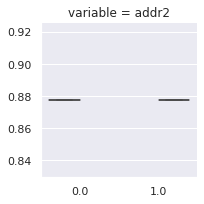

Dataset 3


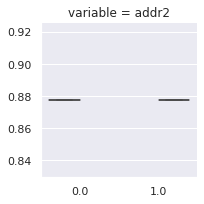

*****************
*****************
Feature V18
Dataset 0


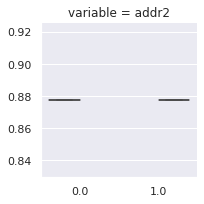

Dataset 1


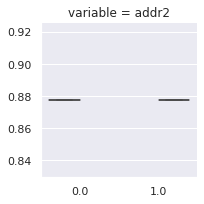

Dataset 2


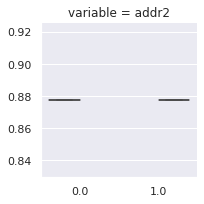

Dataset 3


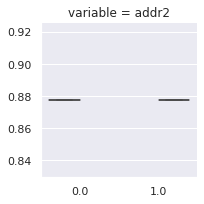

*****************
*****************
Feature V19
Dataset 0


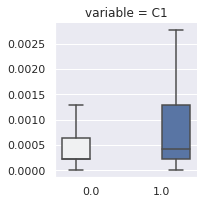

Dataset 1


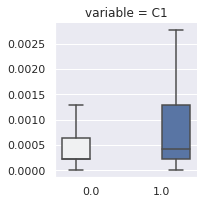

Dataset 2


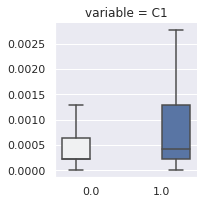

Dataset 3


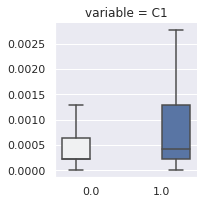

*****************
*****************
Feature V20
Dataset 0


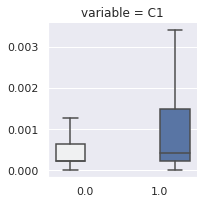

Dataset 1


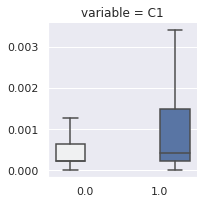

Dataset 2


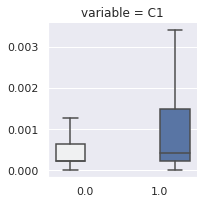

Dataset 3


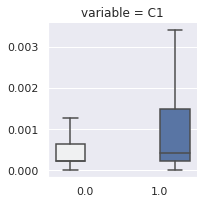

*****************
*****************
Feature V21
Dataset 0


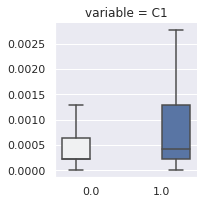

Dataset 1


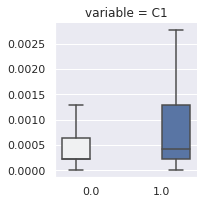

Dataset 2


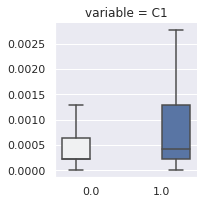

Dataset 3


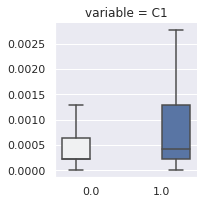

*****************
*****************
Feature V22
Dataset 0


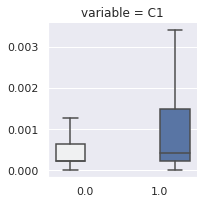

Dataset 1


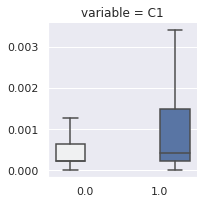

Dataset 2


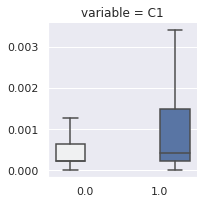

Dataset 3


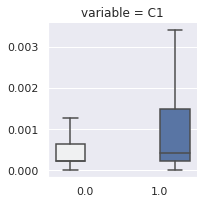

*****************
*****************
Feature V23
Dataset 0


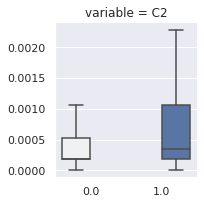

Dataset 1


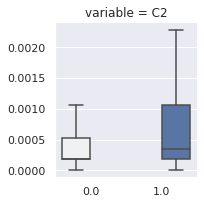

Dataset 2


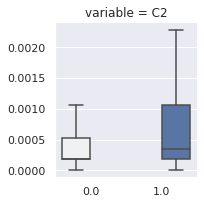

Dataset 3


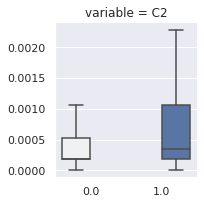

*****************
*****************
Feature V24
Dataset 0


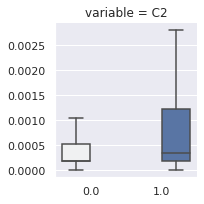

Dataset 1


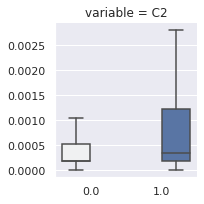

Dataset 2


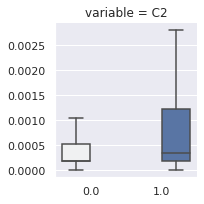

Dataset 3


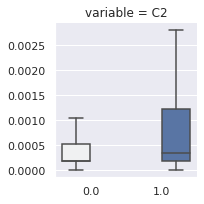

*****************
*****************
Feature V25
Dataset 0


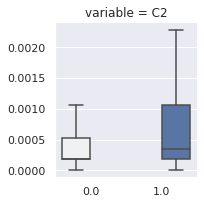

Dataset 1


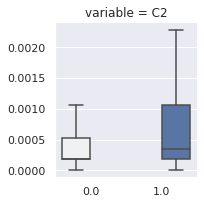

Dataset 2


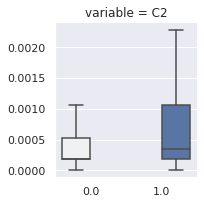

Dataset 3


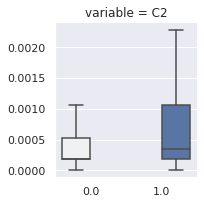

*****************
*****************
Feature V26
Dataset 0


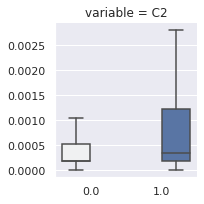

Dataset 1


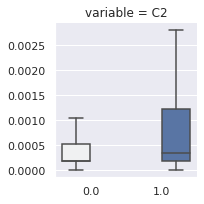

Dataset 2


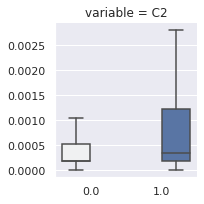

Dataset 3


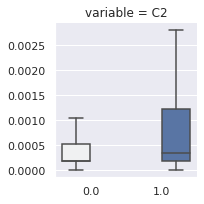

*****************
*****************
Feature V27
Dataset 0


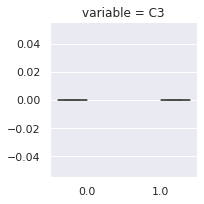

Dataset 1


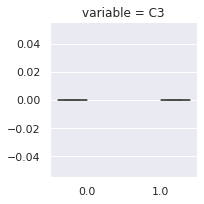

Dataset 2


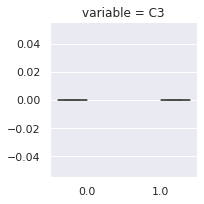

Dataset 3


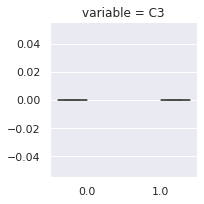

*****************
*****************
Feature V28
Dataset 0


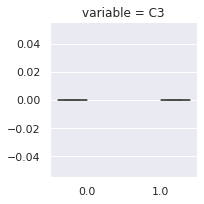

Dataset 1


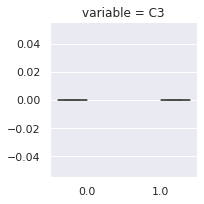

Dataset 2


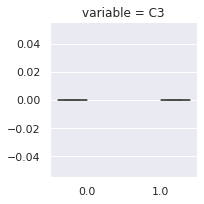

Dataset 3


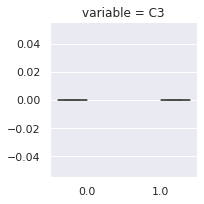

*****************
*****************
Feature V29
Dataset 0


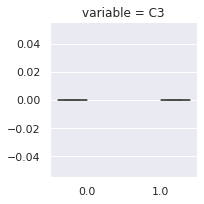

Dataset 1


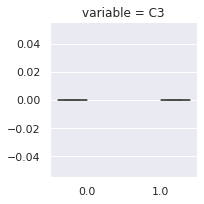

Dataset 2


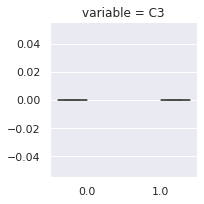

Dataset 3


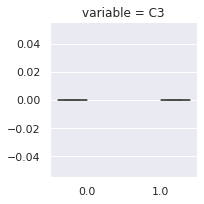

*****************
*****************
Feature V30
Dataset 0


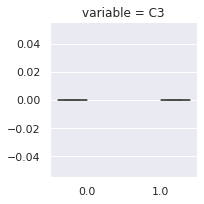

Dataset 1


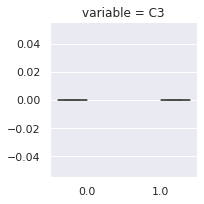

Dataset 2


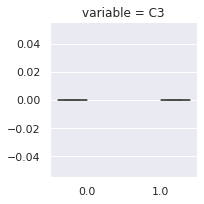

Dataset 3


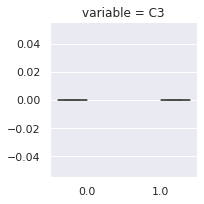

*****************
*****************
Feature V31
Dataset 0


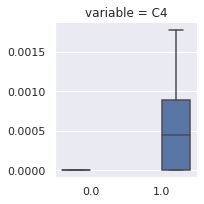

Dataset 1


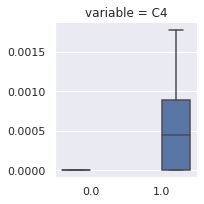

Dataset 2


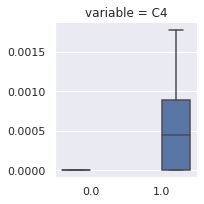

Dataset 3


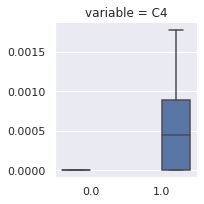

*****************
*****************
Feature V32
Dataset 0


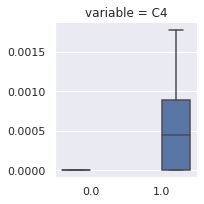

Dataset 1


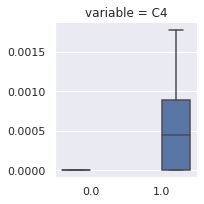

Dataset 2


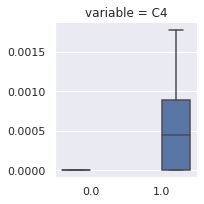

Dataset 3


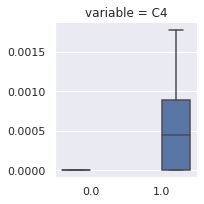

*****************
*****************
Feature V33
Dataset 0


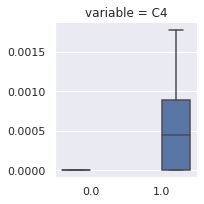

Dataset 1


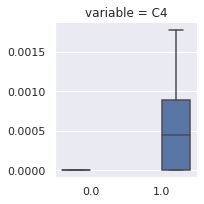

Dataset 2


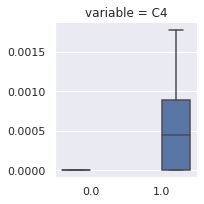

Dataset 3


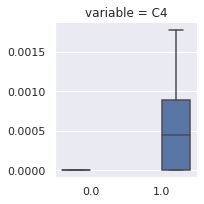

*****************
*****************
Feature V34
Dataset 0


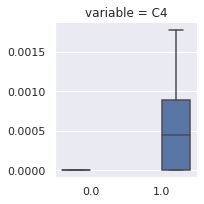

Dataset 1


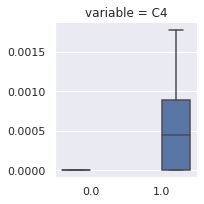

Dataset 2


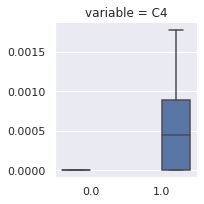

Dataset 3


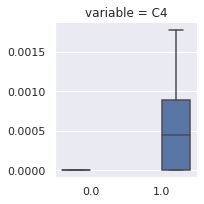

*****************
*****************
Feature V53
Dataset 0


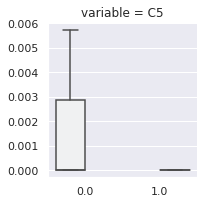

Dataset 1


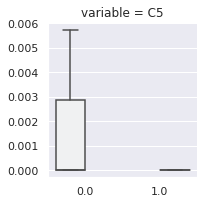

Dataset 2


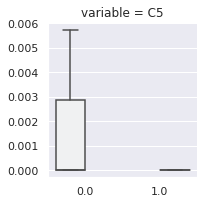

Dataset 3


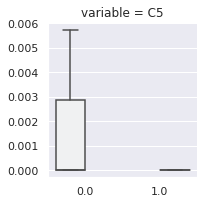

*****************
*****************
Feature V54
Dataset 0


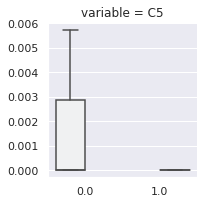

Dataset 1


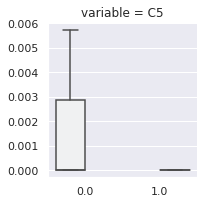

Dataset 2


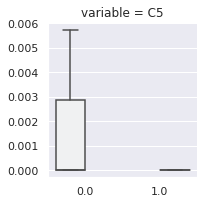

Dataset 3


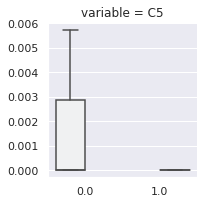

*****************
*****************
Feature V55
Dataset 0


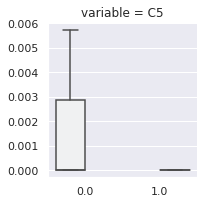

Dataset 1


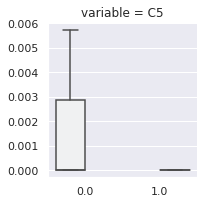

Dataset 2


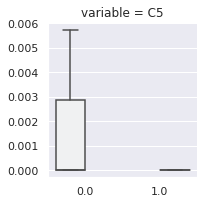

Dataset 3


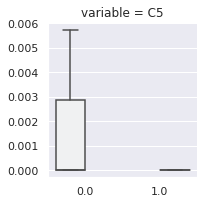

*****************
*****************
Feature V56
Dataset 0


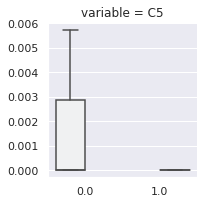

Dataset 1


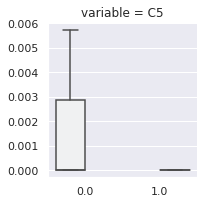

Dataset 2


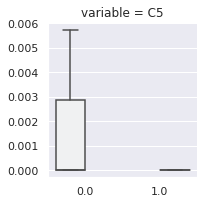

Dataset 3


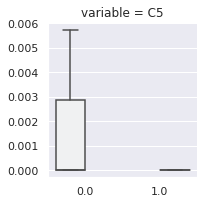

*****************
*****************
Feature V57
Dataset 0


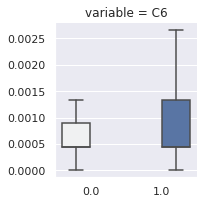

Dataset 1


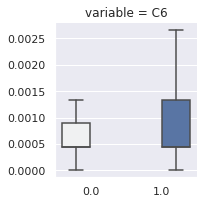

Dataset 2


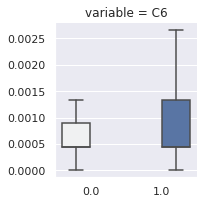

Dataset 3


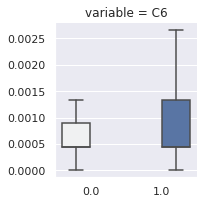

*****************
*****************
Feature V58
Dataset 0


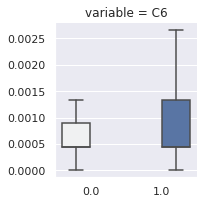

Dataset 1


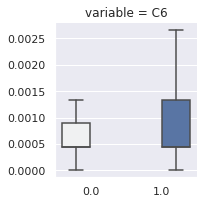

Dataset 2


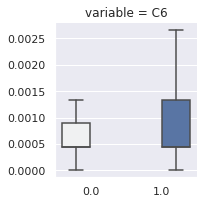

Dataset 3


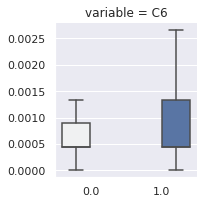

*****************
*****************
Feature V59
Dataset 0


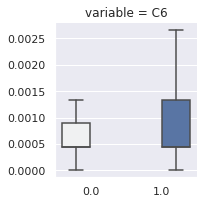

Dataset 1


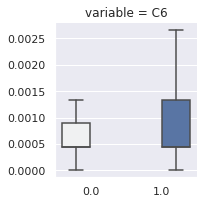

Dataset 2


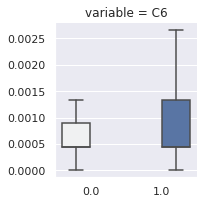

Dataset 3


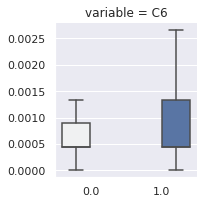

*****************
*****************
Feature V60
Dataset 0


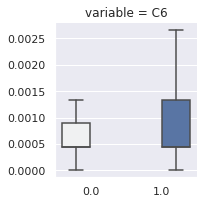

Dataset 1


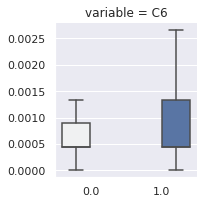

Dataset 2


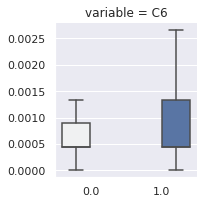

Dataset 3


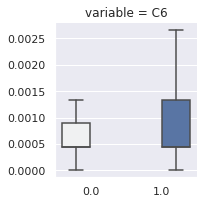

*****************
*****************
Feature V61
Dataset 0


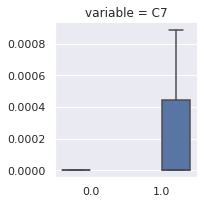

Dataset 1


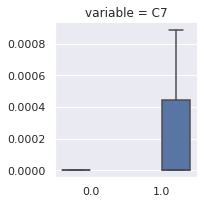

Dataset 2


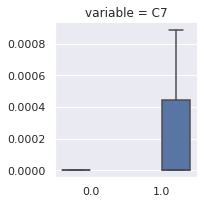

Dataset 3


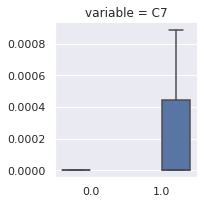

*****************
*****************
Feature V62
Dataset 0


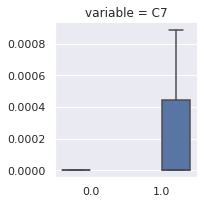

Dataset 1


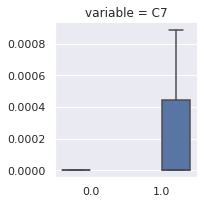

Dataset 2


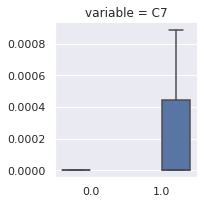

Dataset 3


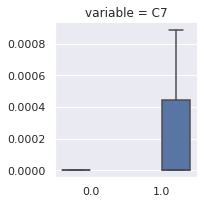

*****************
*****************
Feature V63
Dataset 0


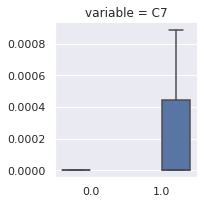

Dataset 1


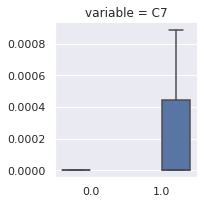

Dataset 2


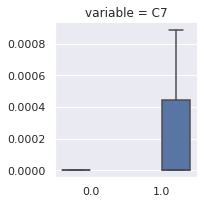

Dataset 3


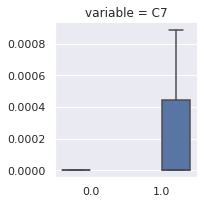

*****************
*****************
Feature V64
Dataset 0


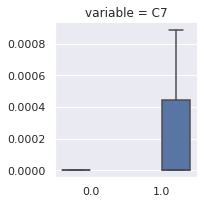

Dataset 1


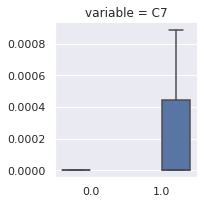

Dataset 2


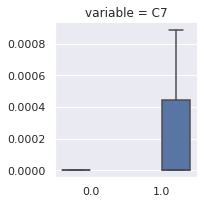

Dataset 3


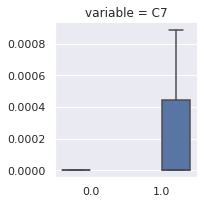

*****************
*****************
Feature V65
Dataset 0


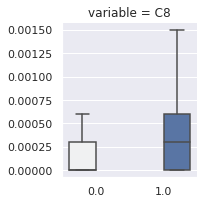

Dataset 1


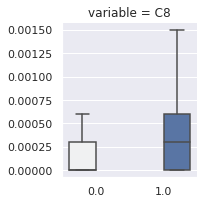

Dataset 2


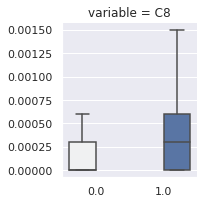

Dataset 3


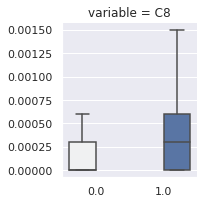

*****************
*****************
Feature V66
Dataset 0


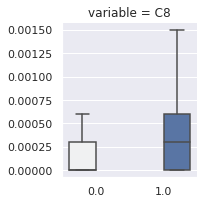

Dataset 1


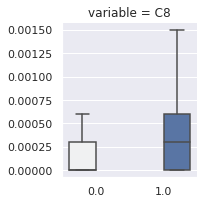

Dataset 2


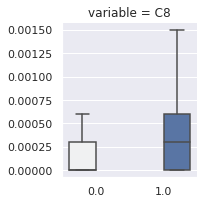

Dataset 3


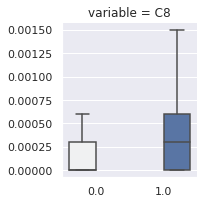

*****************
*****************
Feature V67
Dataset 0


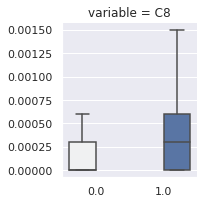

Dataset 1


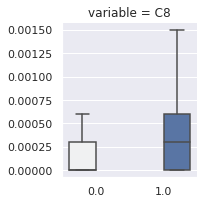

Dataset 2


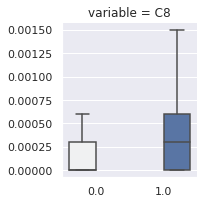

Dataset 3


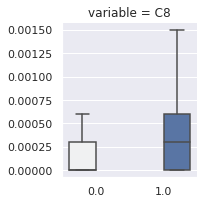

*****************
*****************
Feature V68
Dataset 0


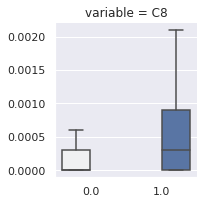

Dataset 1


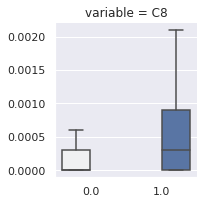

Dataset 2


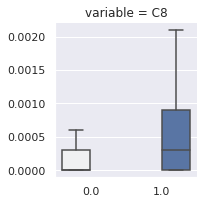

Dataset 3


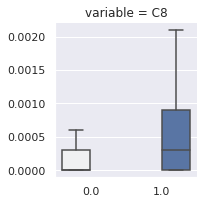

*****************
*****************
Feature V69
Dataset 0


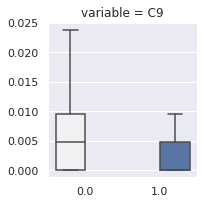

Dataset 1


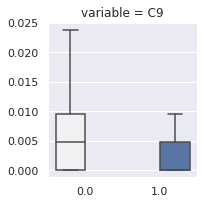

Dataset 2


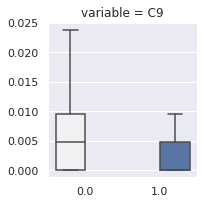

Dataset 3


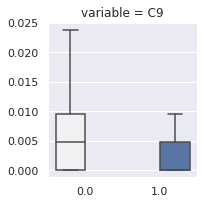

*****************
*****************
Feature V70
Dataset 0


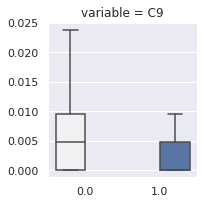

Dataset 1


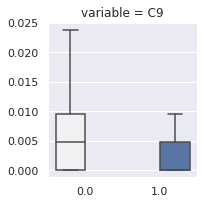

Dataset 2


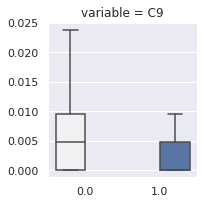

Dataset 3


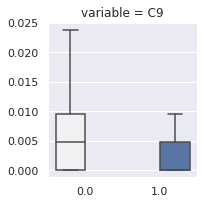

*****************
*****************
Feature V71
Dataset 0


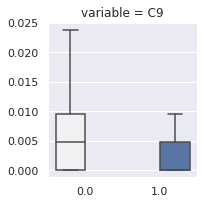

Dataset 1


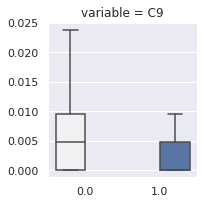

Dataset 2


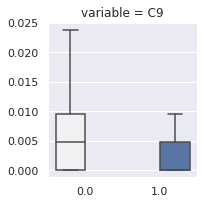

Dataset 3


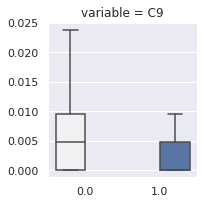

*****************
*****************
Feature V72
Dataset 0


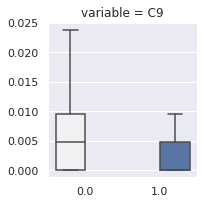

Dataset 1


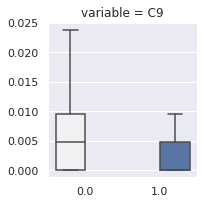

Dataset 2


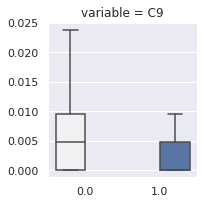

Dataset 3


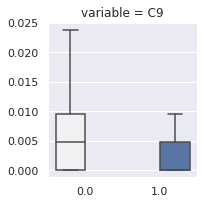

*****************
*****************
Feature V73
Dataset 0


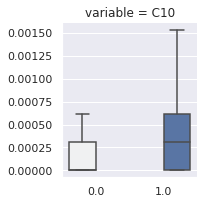

Dataset 1


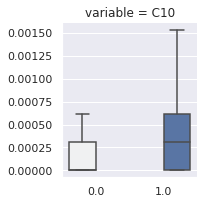

Dataset 2


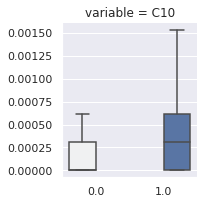

Dataset 3


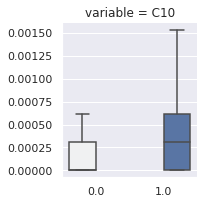

*****************
*****************
Feature V74
Dataset 0


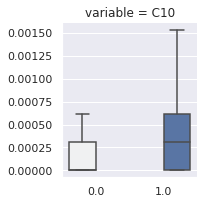

Dataset 1


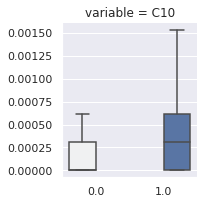

Dataset 2


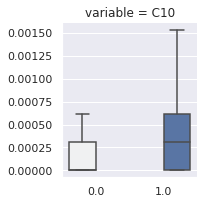

Dataset 3


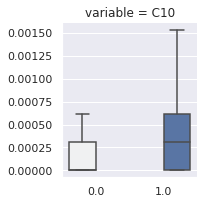

*****************
*****************
Feature V75
Dataset 0


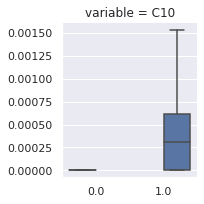

Dataset 1


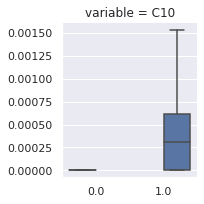

Dataset 2


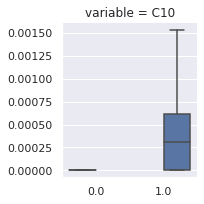

Dataset 3


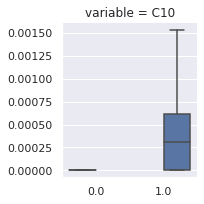

*****************
*****************
Feature V76
Dataset 0


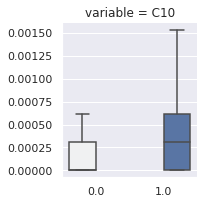

Dataset 1


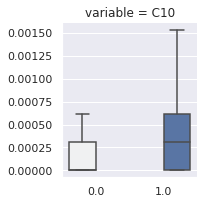

Dataset 2


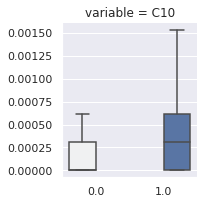

Dataset 3


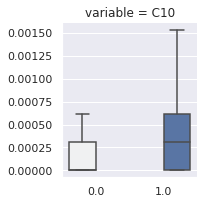

*****************
*****************
Feature V77
Dataset 0


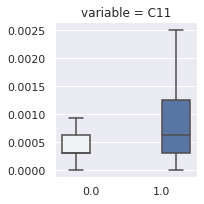

Dataset 1


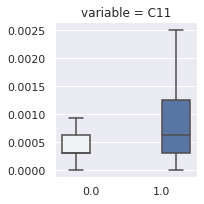

Dataset 2


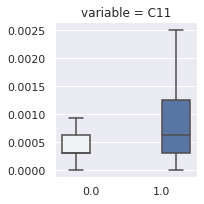

Dataset 3


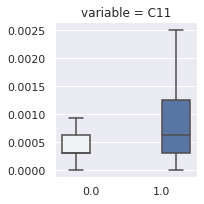

*****************
*****************
Feature V78
Dataset 0


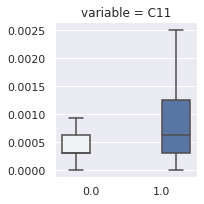

Dataset 1


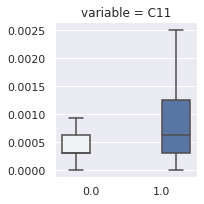

Dataset 2


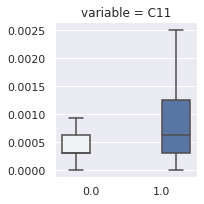

Dataset 3


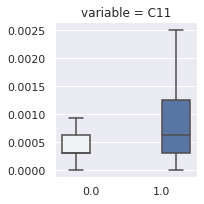

*****************
*****************
Feature V79
Dataset 0


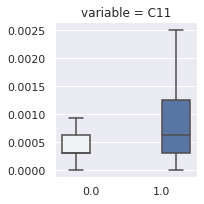

Dataset 1


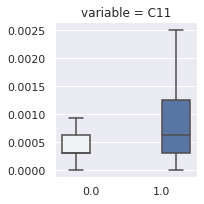

Dataset 2


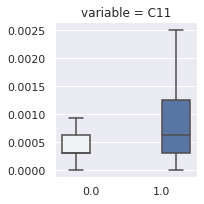

Dataset 3


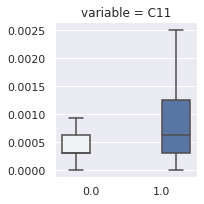

*****************
*****************
Feature V80
Dataset 0


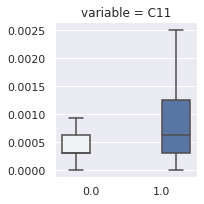

Dataset 1


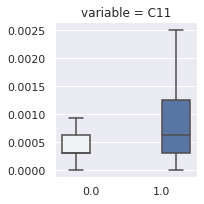

Dataset 2


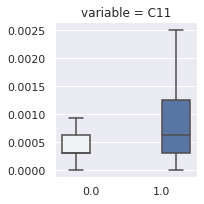

Dataset 3


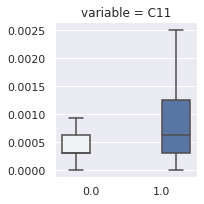

*****************
*****************
Feature V81
Dataset 0


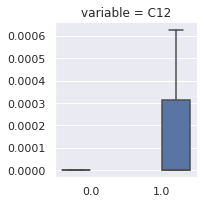

Dataset 1


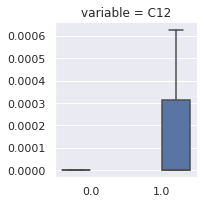

Dataset 2


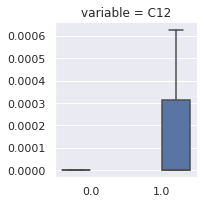

Dataset 3


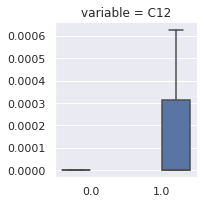

*****************
*****************
Feature V82
Dataset 0


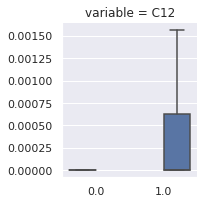

Dataset 1


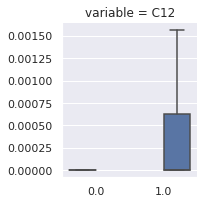

Dataset 2


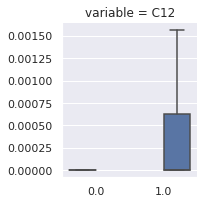

Dataset 3


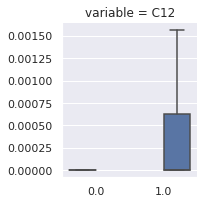

*****************
*****************
Feature V83
Dataset 0


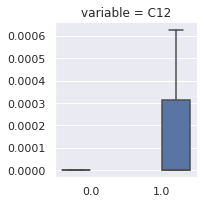

Dataset 1


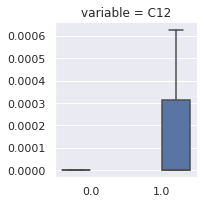

Dataset 2


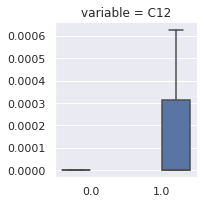

Dataset 3


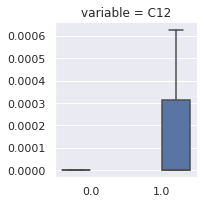

*****************
*****************
Feature V84
Dataset 0


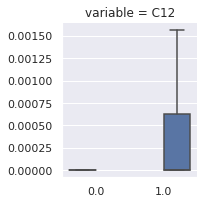

Dataset 1


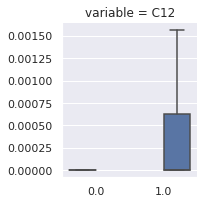

Dataset 2


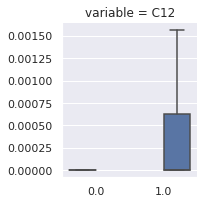

Dataset 3


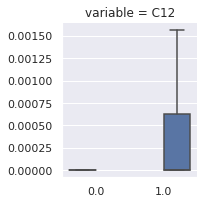

*****************
*****************
Feature V85
Dataset 0


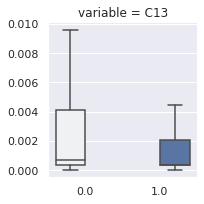

Dataset 1


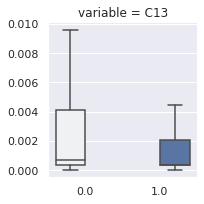

Dataset 2


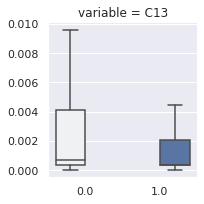

Dataset 3


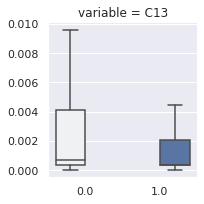

*****************
*****************
Feature V86
Dataset 0


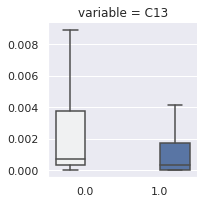

Dataset 1


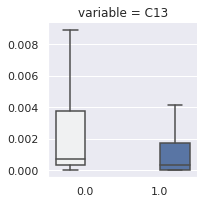

Dataset 2


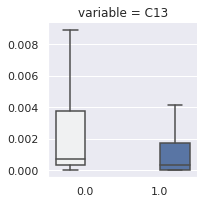

Dataset 3


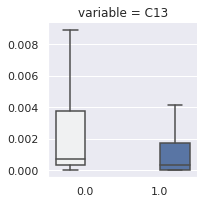

*****************
*****************
Feature V87
Dataset 0


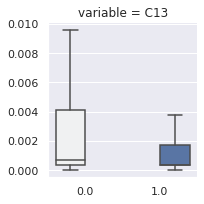

Dataset 1


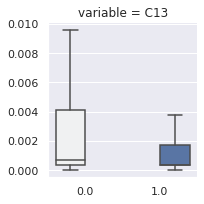

Dataset 2


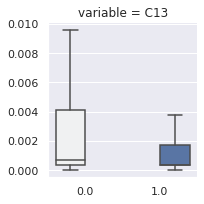

Dataset 3


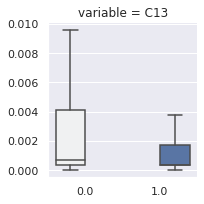

*****************
*****************
Feature V88
Dataset 0


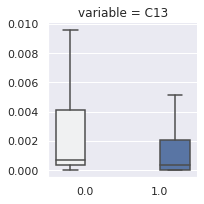

Dataset 1


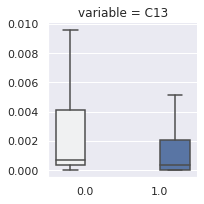

Dataset 2


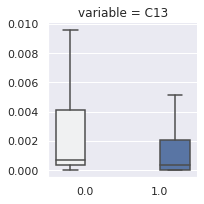

Dataset 3


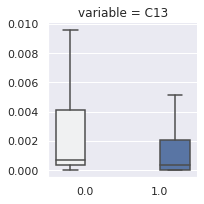

*****************
*****************
Feature V89
Dataset 0


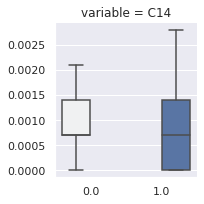

Dataset 1


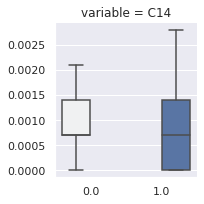

Dataset 2


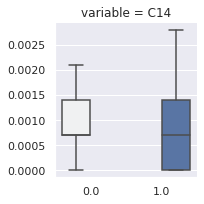

Dataset 3


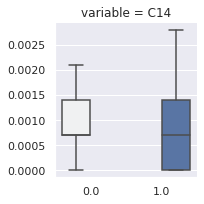

*****************
*****************
Feature V90
Dataset 0


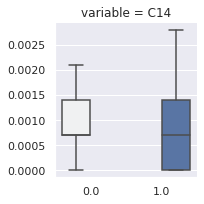

Dataset 1


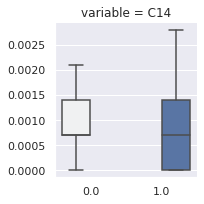

Dataset 2


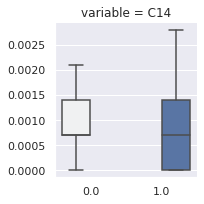

Dataset 3


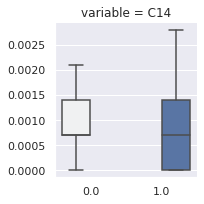

*****************
*****************
Feature V91
Dataset 0


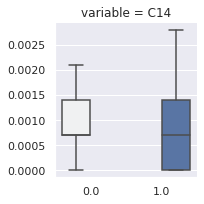

Dataset 1


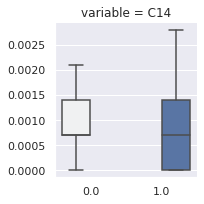

Dataset 2


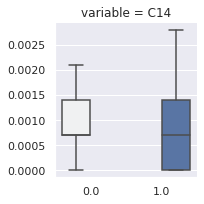

Dataset 3


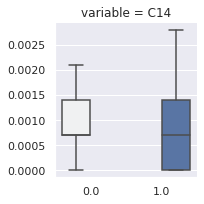

*****************
*****************
Feature V92
Dataset 0


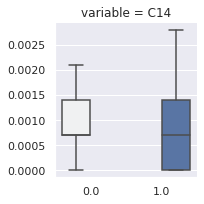

Dataset 1


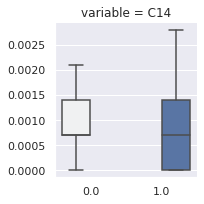

Dataset 2


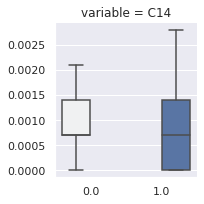

Dataset 3


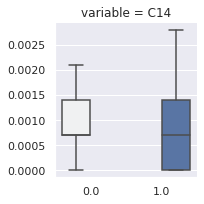

*****************
*****************
Feature V93
Dataset 0


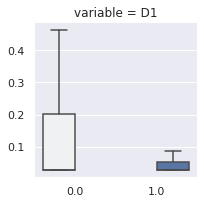

Dataset 1


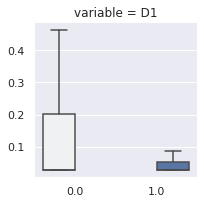

Dataset 2


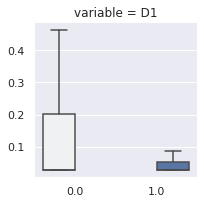

Dataset 3


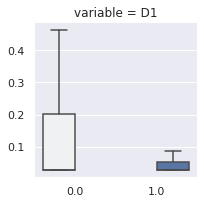

*****************
*****************
Feature V94
Dataset 0


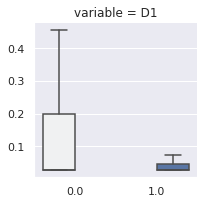

Dataset 1


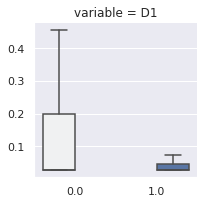

Dataset 2


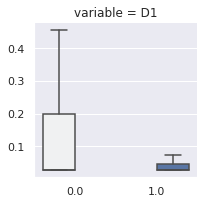

Dataset 3


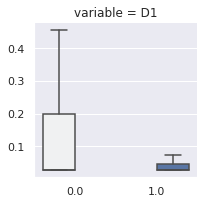

*****************
*****************
Feature V95
Dataset 0


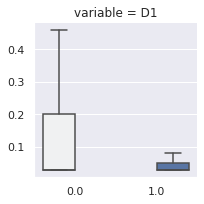

Dataset 1


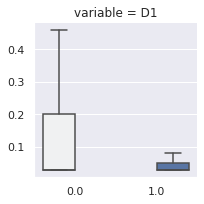

Dataset 2


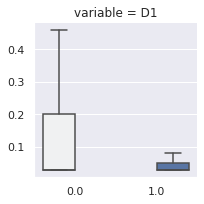

Dataset 3


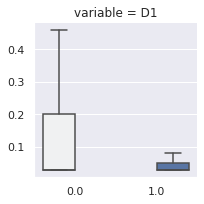

*****************
*****************
Feature V96
Dataset 0


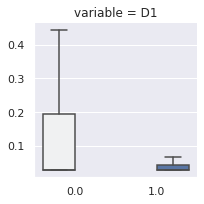

Dataset 1


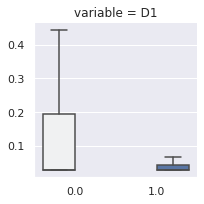

Dataset 2


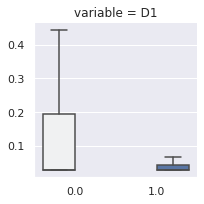

Dataset 3


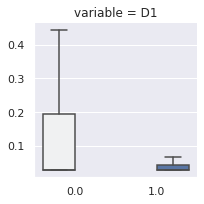

*****************
*****************
Feature V97
Dataset 0


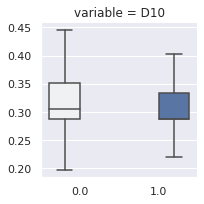

Dataset 1


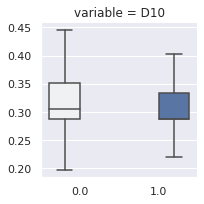

Dataset 2


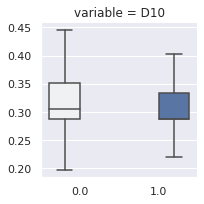

Dataset 3


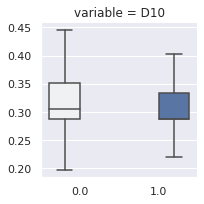

*****************
*****************
Feature V98
Dataset 0


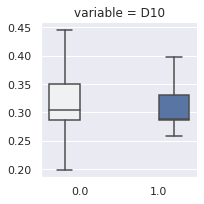

Dataset 1


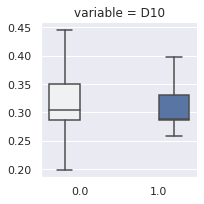

Dataset 2


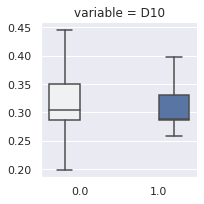

Dataset 3


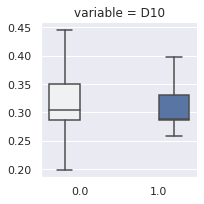

*****************
*****************
Feature V99
Dataset 0


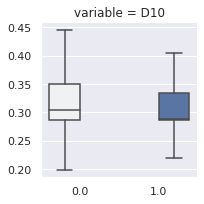

Dataset 1


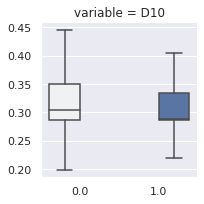

Dataset 2


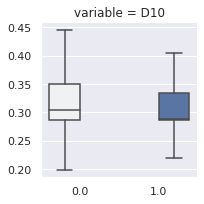

Dataset 3


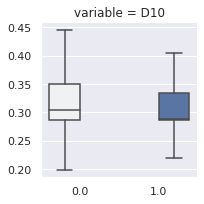

*****************
*****************
Feature V100
Dataset 0


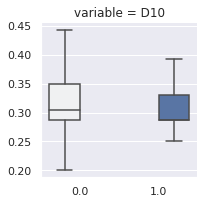

Dataset 1


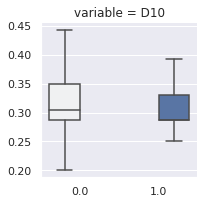

Dataset 2


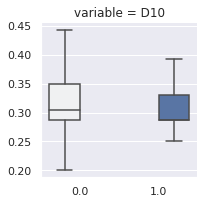

Dataset 3


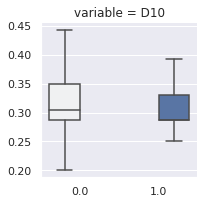

*****************
*****************
Feature V101
Dataset 0


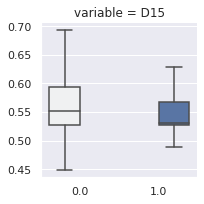

Dataset 1


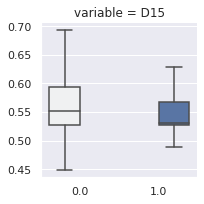

Dataset 2


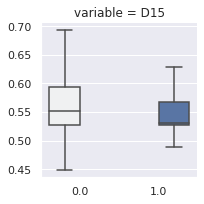

Dataset 3


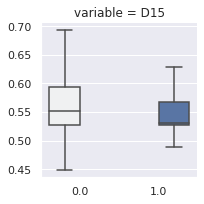

*****************
*****************
Feature V102
Dataset 0


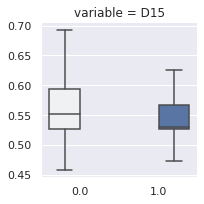

Dataset 1


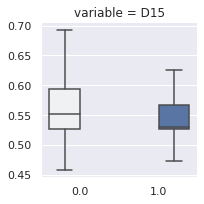

Dataset 2


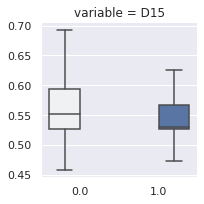

Dataset 3


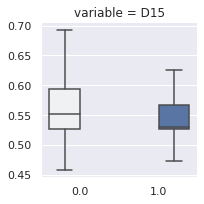

*****************
*****************
Feature V103
Dataset 0


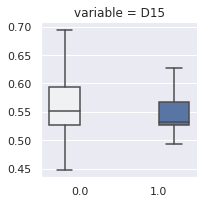

Dataset 1


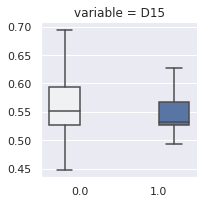

Dataset 2


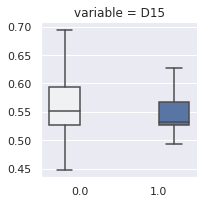

Dataset 3


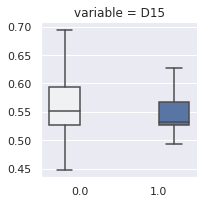

*****************
*****************
Feature V104
Dataset 0


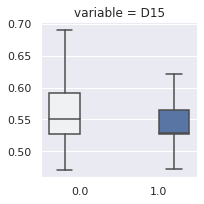

Dataset 1


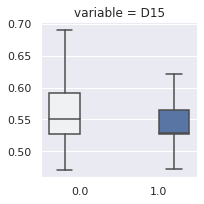

Dataset 2


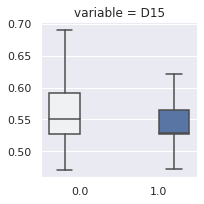

Dataset 3


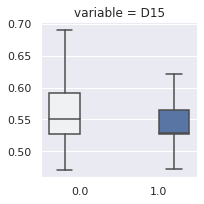

*****************
*****************
Feature V105
Dataset 0


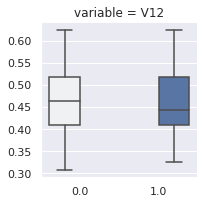

Dataset 1


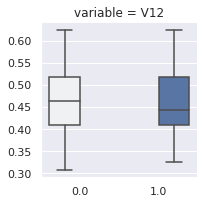

Dataset 2


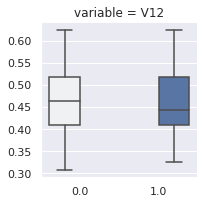

Dataset 3


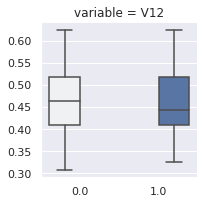

*****************
*****************
Feature V106
Dataset 0


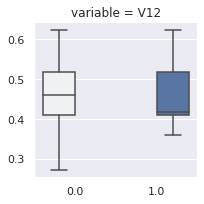

Dataset 1


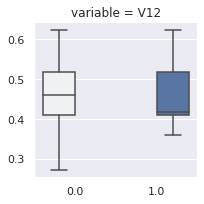

Dataset 2


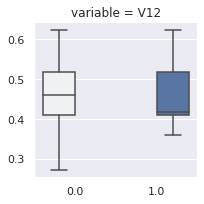

Dataset 3


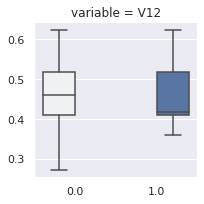

*****************
*****************
Feature V107
Dataset 0


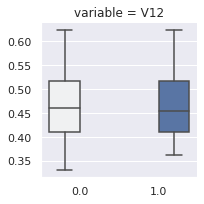

Dataset 1


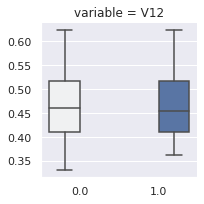

Dataset 2


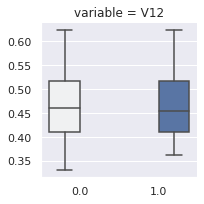

Dataset 3


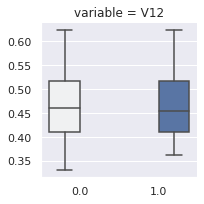

*****************
*****************
Feature V108
Dataset 0


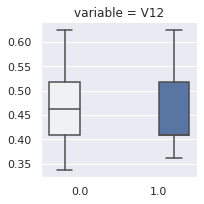

Dataset 1


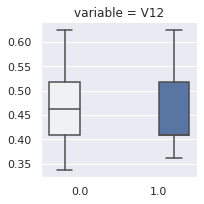

Dataset 2


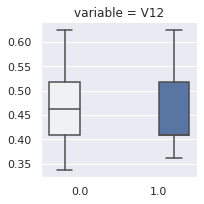

Dataset 3


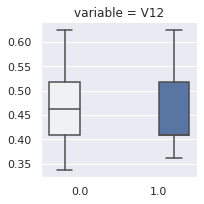

*****************
*****************
Feature V109
Dataset 0


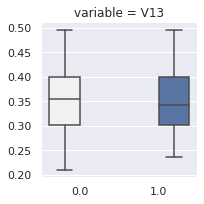

Dataset 1


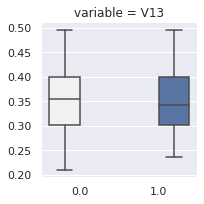

Dataset 2


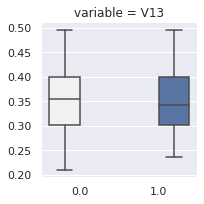

Dataset 3


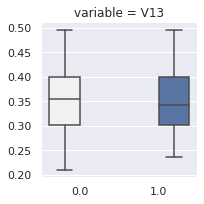

*****************
*****************
Feature V110
Dataset 0


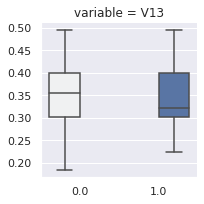

Dataset 1


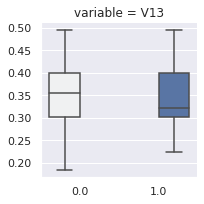

Dataset 2


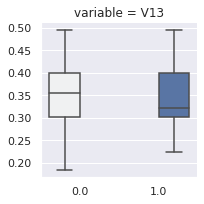

Dataset 3


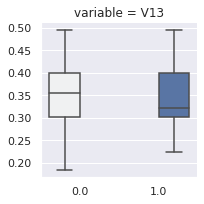

*****************
*****************
Feature V111
Dataset 0


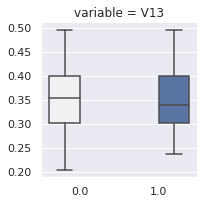

Dataset 1


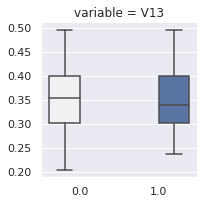

Dataset 2


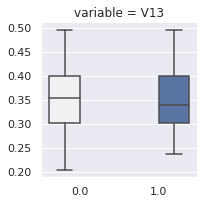

Dataset 3


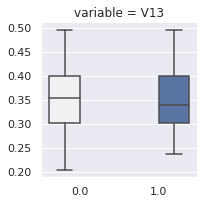

*****************
*****************
Feature V112
Dataset 0


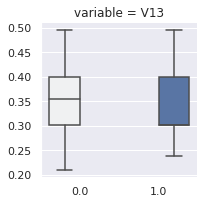

Dataset 1


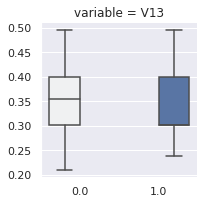

Dataset 2


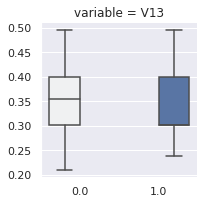

Dataset 3


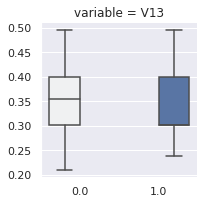

*****************
*****************
Feature V113
Dataset 0


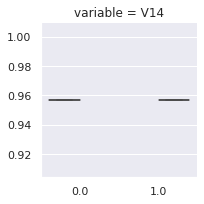

Dataset 1


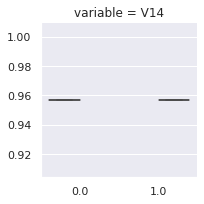

Dataset 2


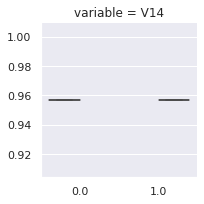

Dataset 3


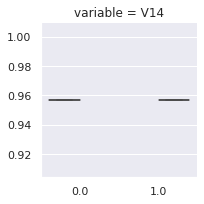

*****************
*****************
Feature V114
Dataset 0


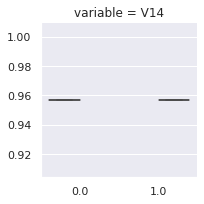

Dataset 1


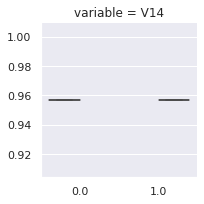

Dataset 2


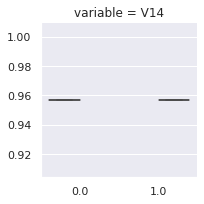

Dataset 3


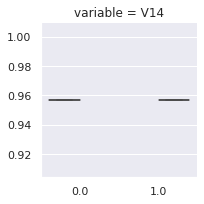

*****************
*****************
Feature V115
Dataset 0


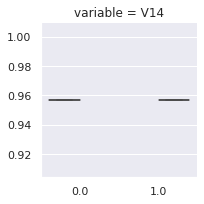

Dataset 1


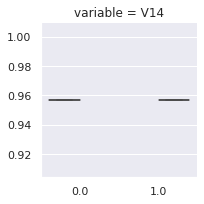

Dataset 2


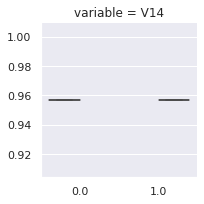

Dataset 3


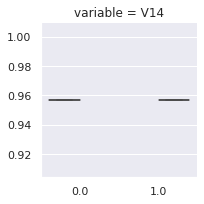

*****************
*****************
Feature V116
Dataset 0


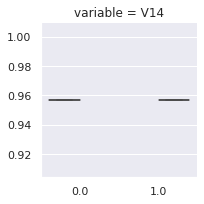

Dataset 1


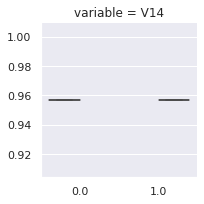

Dataset 2


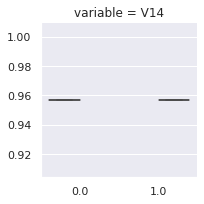

Dataset 3


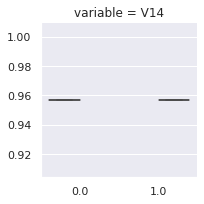

*****************
*****************
Feature V117
Dataset 0


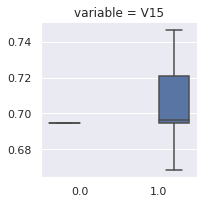

Dataset 1


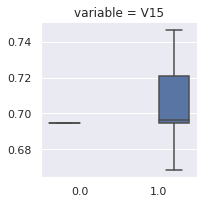

Dataset 2


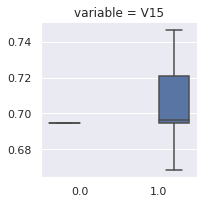

Dataset 3


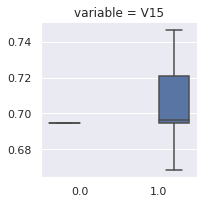

*****************
*****************
Feature V118
Dataset 0


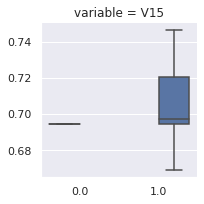

Dataset 1


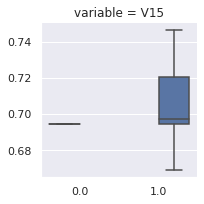

Dataset 2


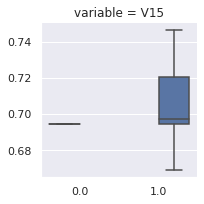

Dataset 3


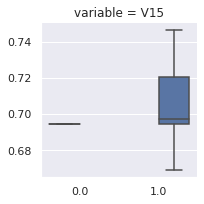

*****************
*****************
Feature V119
Dataset 0


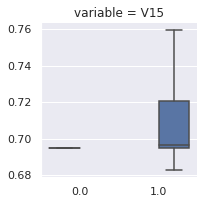

Dataset 1


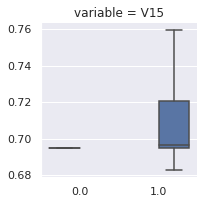

Dataset 2


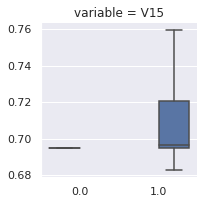

Dataset 3


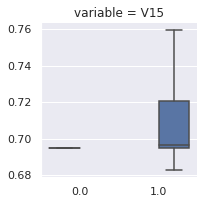

*****************
*****************
Feature V120
Dataset 0


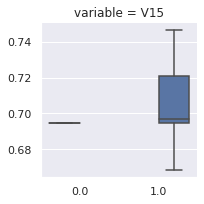

Dataset 1


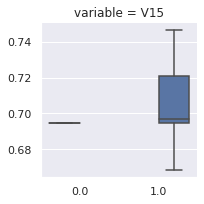

Dataset 2


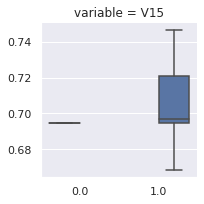

Dataset 3


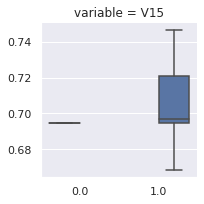

*****************
*****************
Feature V121
Dataset 0


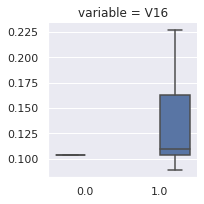

Dataset 1


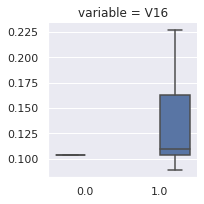

Dataset 2


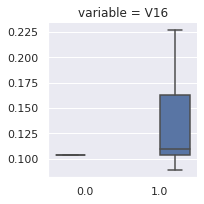

Dataset 3


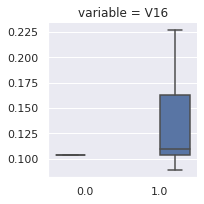

*****************
*****************
Feature V122
Dataset 0


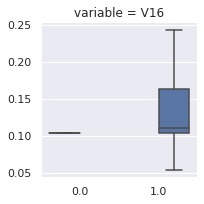

Dataset 1


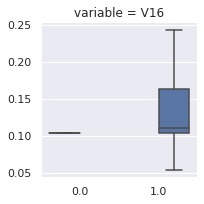

Dataset 2


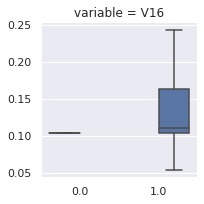

Dataset 3


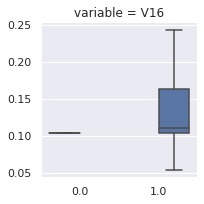

*****************
*****************
Feature V123
Dataset 0


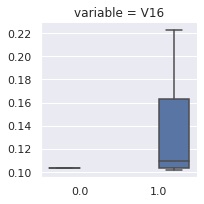

Dataset 1


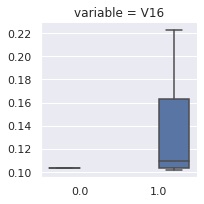

Dataset 2


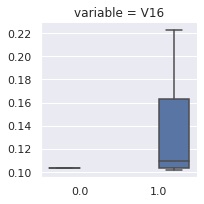

Dataset 3


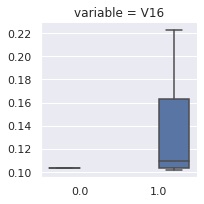

*****************
*****************
Feature V124
Dataset 0


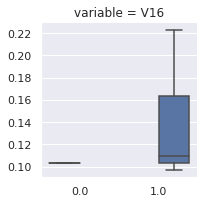

Dataset 1


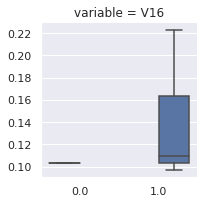

Dataset 2


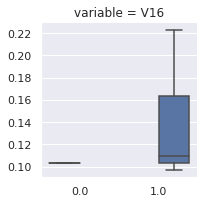

Dataset 3


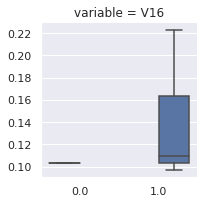

*****************
*****************
Feature V125
Dataset 0


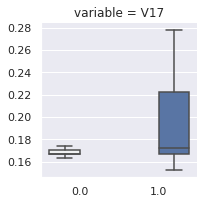

Dataset 1


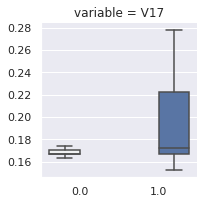

Dataset 2


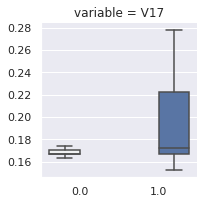

Dataset 3


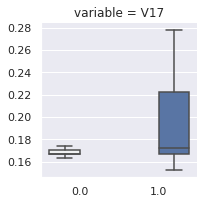

*****************
*****************
Feature V126
Dataset 0


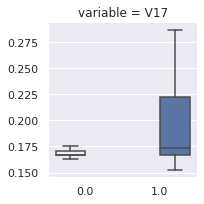

Dataset 1


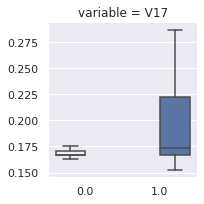

Dataset 2


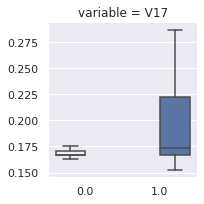

Dataset 3


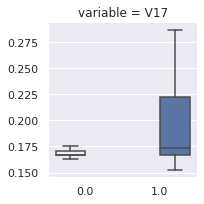

*****************
*****************
Feature V127
Dataset 0


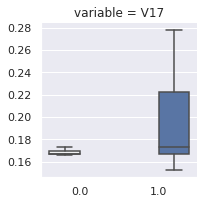

Dataset 1


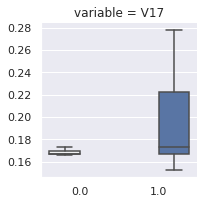

Dataset 2


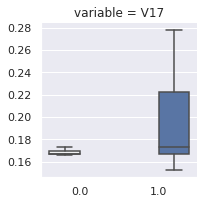

Dataset 3


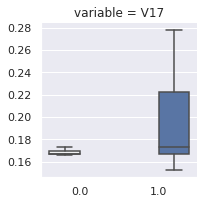

*****************
*****************
Feature V128
Dataset 0


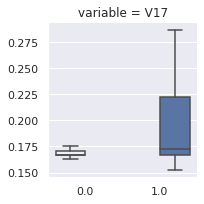

Dataset 1


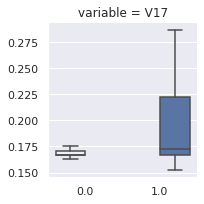

Dataset 2


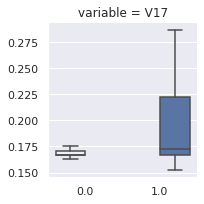

Dataset 3


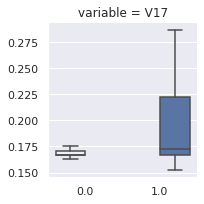

*****************
*****************
Feature V129
Dataset 0


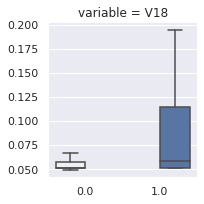

Dataset 1


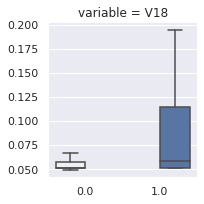

Dataset 2


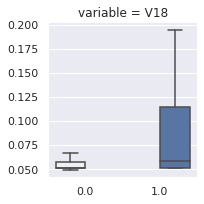

Dataset 3


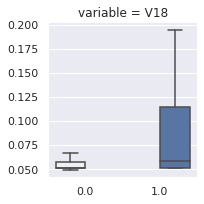

*****************
*****************
Feature V130
Dataset 0


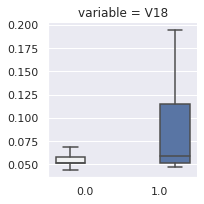

Dataset 1


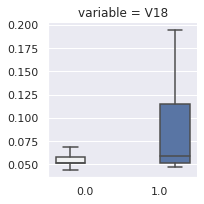

Dataset 2


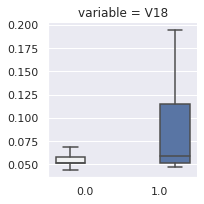

Dataset 3


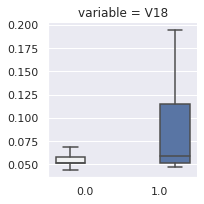

*****************
*****************
Feature V131
Dataset 0


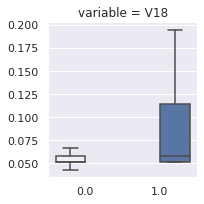

Dataset 1


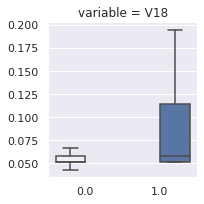

Dataset 2


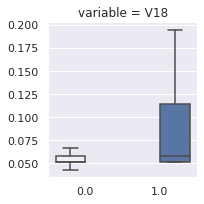

Dataset 3


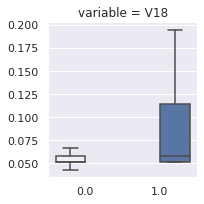

*****************
*****************
Feature V132
Dataset 0


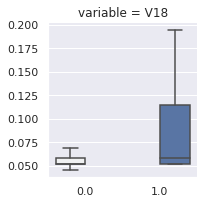

Dataset 1


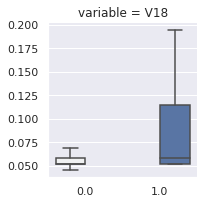

Dataset 2


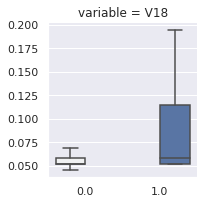

Dataset 3


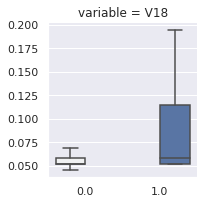

*****************
*****************
Feature V133
Dataset 0


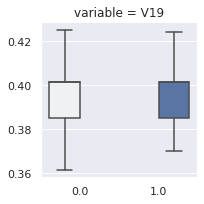

Dataset 1


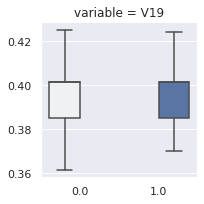

Dataset 2


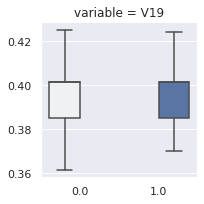

Dataset 3


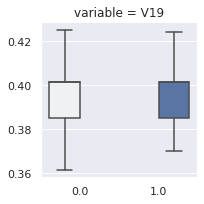

*****************
*****************
Feature V134
Dataset 0


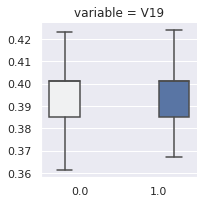

Dataset 1


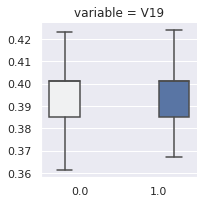

Dataset 2


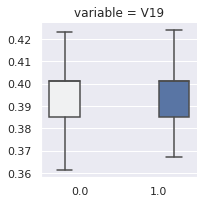

Dataset 3


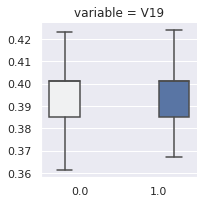

*****************
*****************
Feature V135
Dataset 0


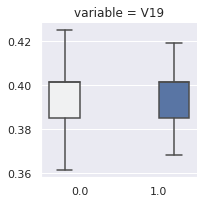

Dataset 1


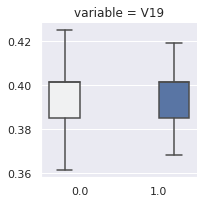

Dataset 2


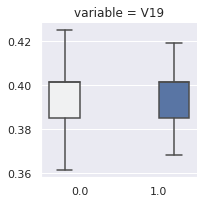

Dataset 3


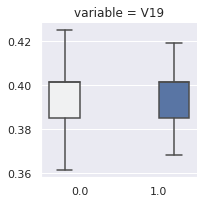

*****************
*****************
Feature V136
Dataset 0


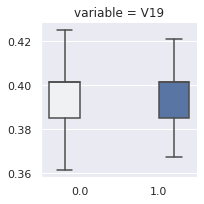

Dataset 1


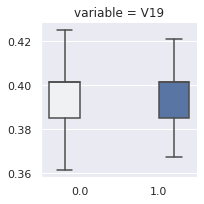

Dataset 2


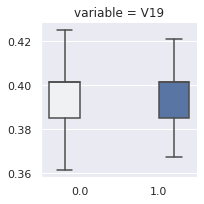

Dataset 3


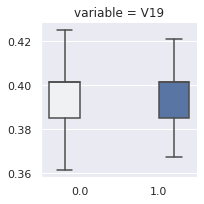

*****************
*****************
Feature V137
Dataset 0


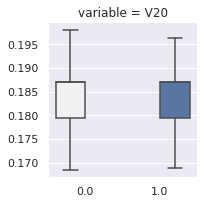

Dataset 1


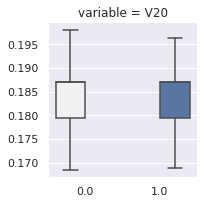

Dataset 2


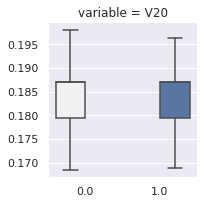

Dataset 3


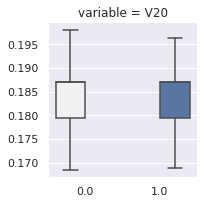

*****************
*****************
Feature V279
Dataset 0


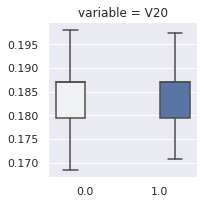

Dataset 1


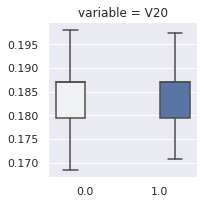

Dataset 2


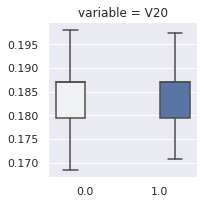

Dataset 3


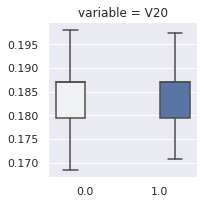

*****************
*****************
Feature V280
Dataset 0


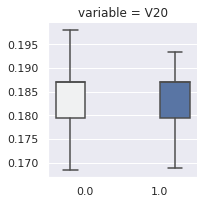

Dataset 1


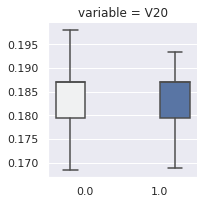

Dataset 2


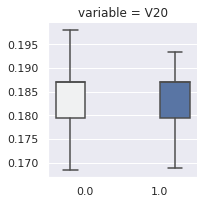

Dataset 3


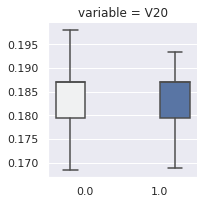

*****************
*****************
Feature V281
Dataset 0


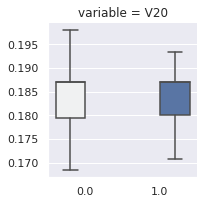

Dataset 1


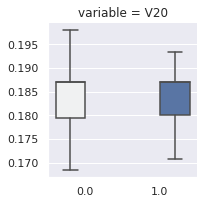

Dataset 2


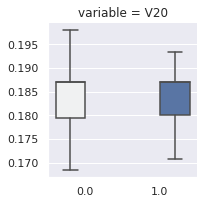

Dataset 3


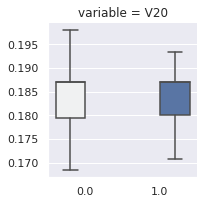

*****************
*****************
Feature V282
Dataset 0


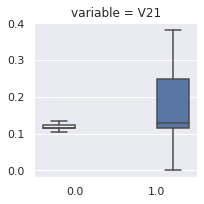

Dataset 1


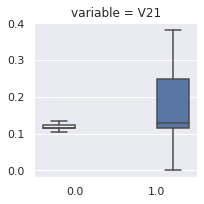

Dataset 2


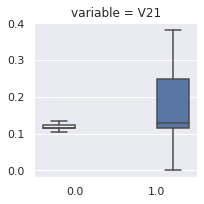

Dataset 3


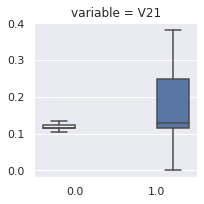

*****************
*****************
Feature V283
Dataset 0


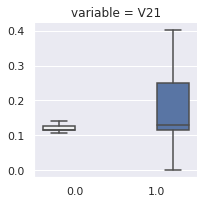

Dataset 1


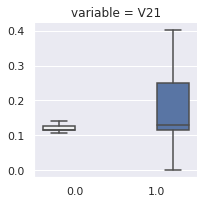

Dataset 2


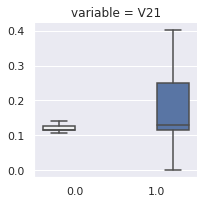

Dataset 3


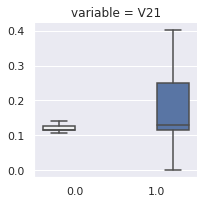

*****************
*****************
Feature V284
Dataset 0


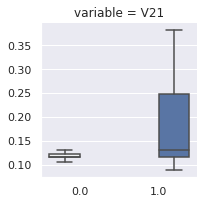

Dataset 1


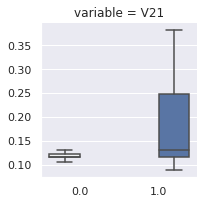

Dataset 2


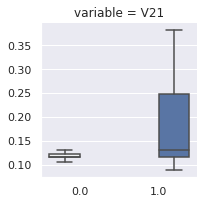

Dataset 3


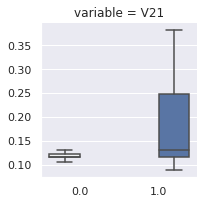

*****************
*****************
Feature V285
Dataset 0


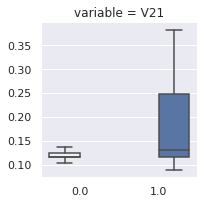

Dataset 1


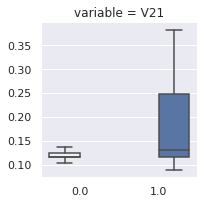

Dataset 2


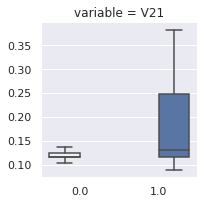

Dataset 3


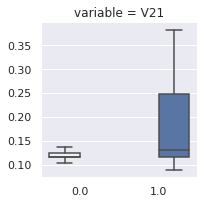

*****************
*****************
Feature V286
Dataset 0


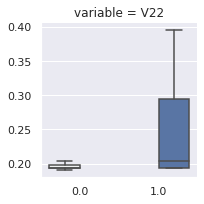

Dataset 1


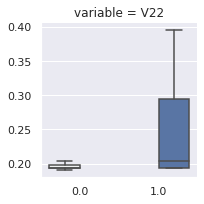

Dataset 2


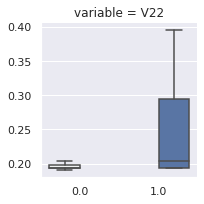

Dataset 3


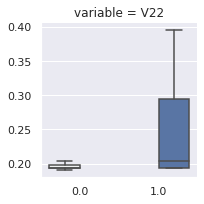

*****************
*****************
Feature V287
Dataset 0


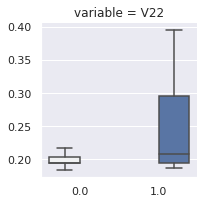

Dataset 1


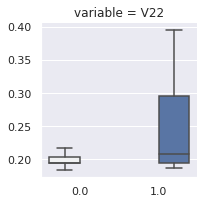

Dataset 2


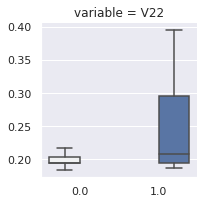

Dataset 3


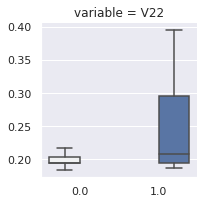

*****************
*****************
Feature V288
Dataset 0


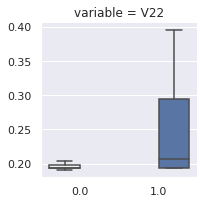

Dataset 1


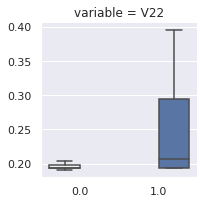

Dataset 2


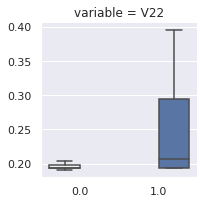

Dataset 3


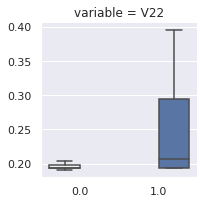

*****************
*****************
Feature V289
Dataset 0


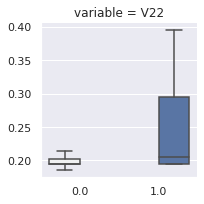

Dataset 1


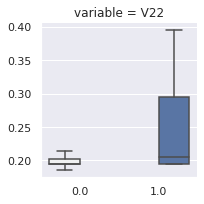

Dataset 2


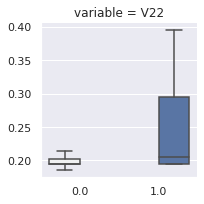

Dataset 3


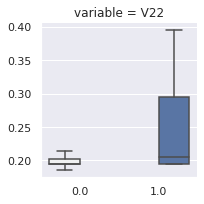

*****************
*****************
Feature V290
Dataset 0


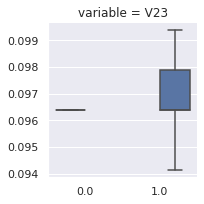

Dataset 1


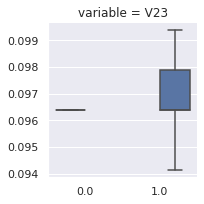

Dataset 2


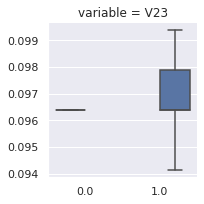

Dataset 3


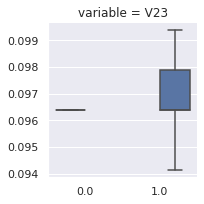

*****************
*****************
Feature V291
Dataset 0


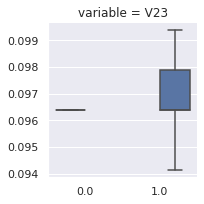

Dataset 1


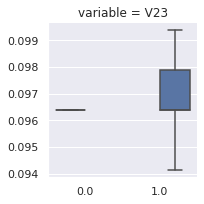

Dataset 2


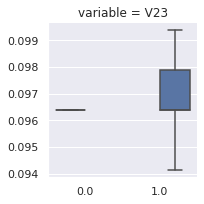

Dataset 3


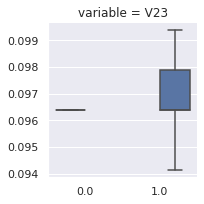

*****************
*****************
Feature V292
Dataset 0


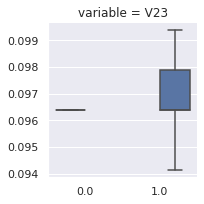

Dataset 1


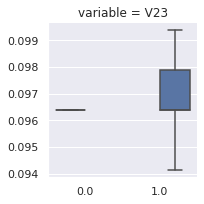

Dataset 2


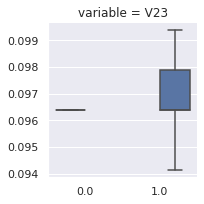

Dataset 3


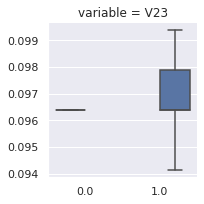

*****************
*****************
Feature V293
Dataset 0


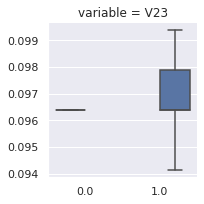

Dataset 1


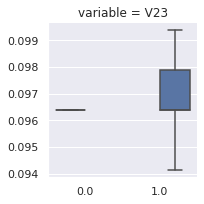

Dataset 2


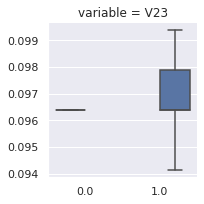

Dataset 3


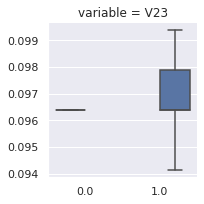

*****************
*****************
Feature V294
Dataset 0


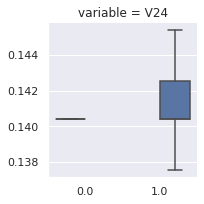

Dataset 1


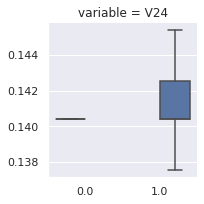

Dataset 2


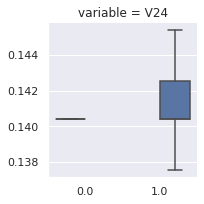

Dataset 3


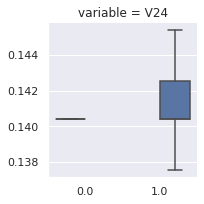

*****************
*****************
Feature V295
Dataset 0


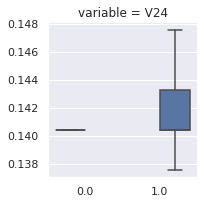

Dataset 1


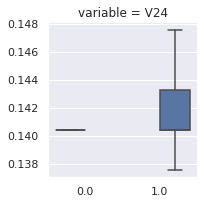

Dataset 2


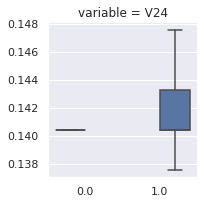

Dataset 3


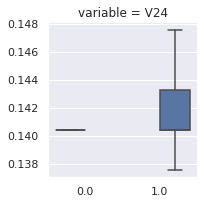

*****************
*****************
Feature V296
Dataset 0


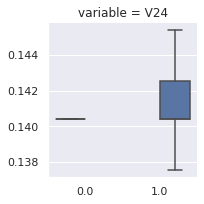

Dataset 1


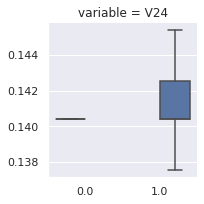

Dataset 2


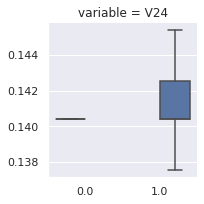

Dataset 3


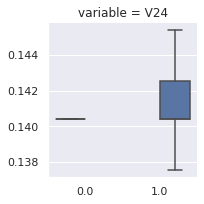

*****************
*****************
Feature V297
Dataset 0


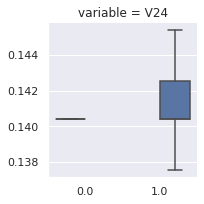

Dataset 1


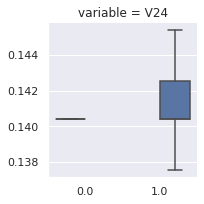

Dataset 2


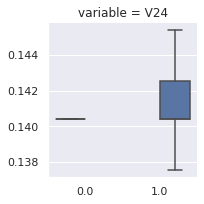

Dataset 3


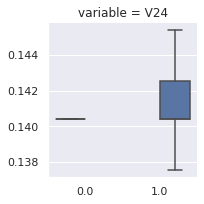

*****************
*****************
Feature V298
Dataset 0


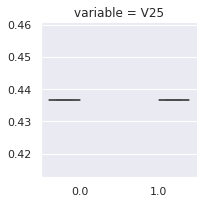

Dataset 1


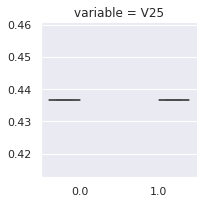

Dataset 2


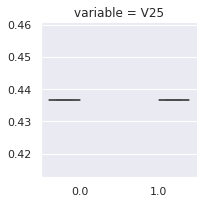

Dataset 3


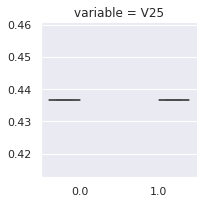

*****************
*****************
Feature V299
Dataset 0


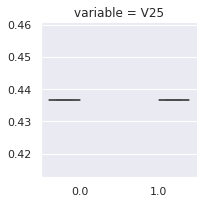

Dataset 1


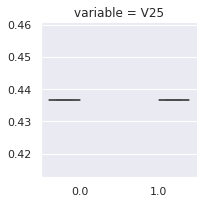

Dataset 2


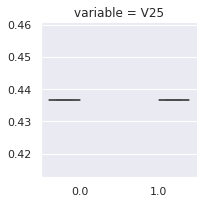

Dataset 3


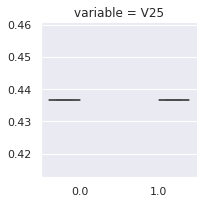

*****************
*****************
Feature V300
Dataset 0


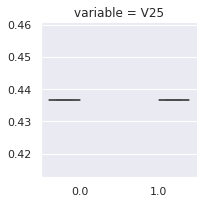

Dataset 1


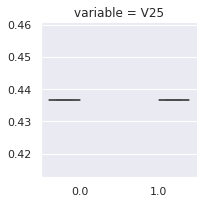

Dataset 2


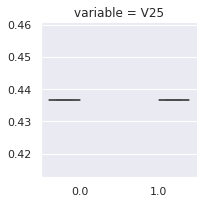

Dataset 3


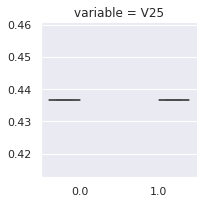

*****************
*****************
Feature V301
Dataset 0


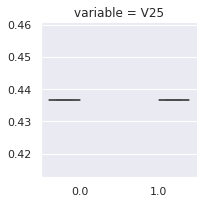

Dataset 1


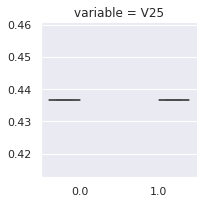

Dataset 2


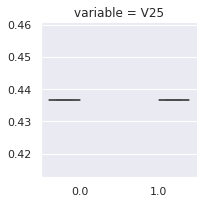

Dataset 3


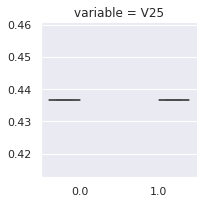

*****************
*****************
Feature V302
Dataset 0


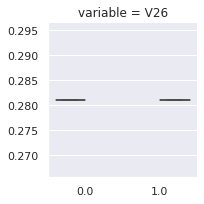

Dataset 1


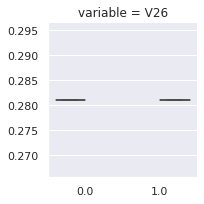

Dataset 2


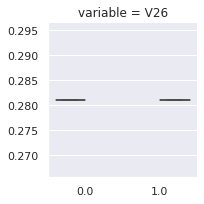

Dataset 3


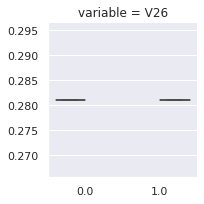

*****************
*****************
Feature V303
Dataset 0


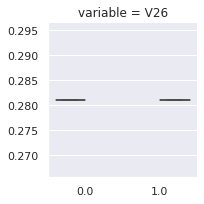

Dataset 1


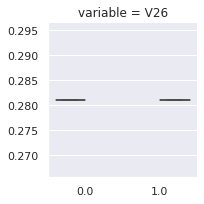

Dataset 2


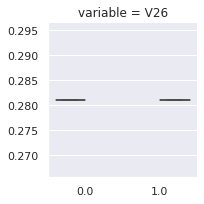

Dataset 3


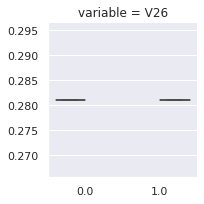

*****************
*****************
Feature V304
Dataset 0


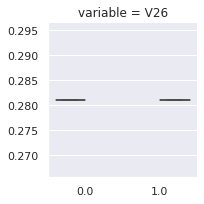

Dataset 1


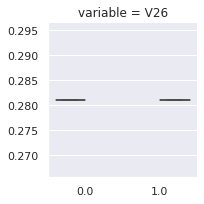

Dataset 2


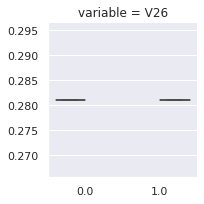

Dataset 3


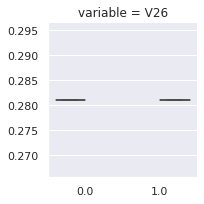

*****************
*****************
Feature V305
Dataset 0


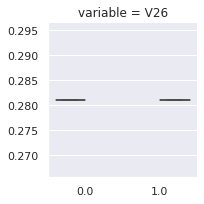

Dataset 1


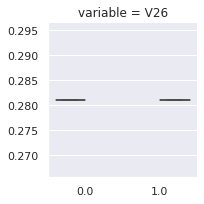

Dataset 2


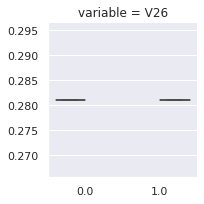

Dataset 3


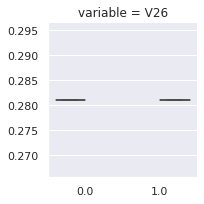

*****************
*****************
Feature V306
Dataset 0


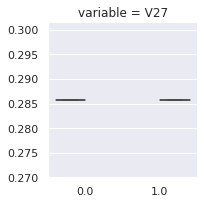

Dataset 1


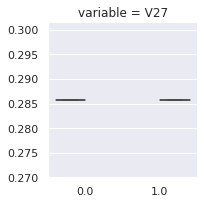

Dataset 2


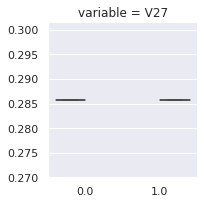

Dataset 3


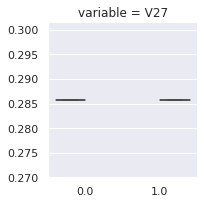

*****************
*****************
Feature V307
Dataset 0


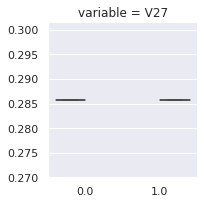

Dataset 1


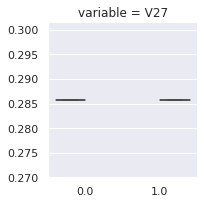

Dataset 2


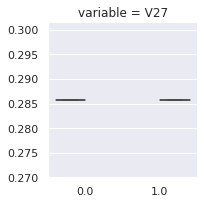

Dataset 3


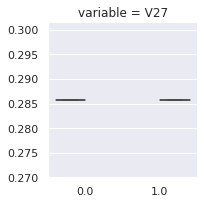

*****************
*****************
Feature V308
Dataset 0


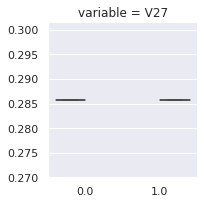

Dataset 1


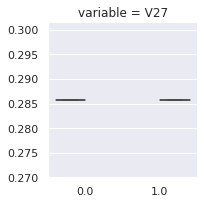

Dataset 2


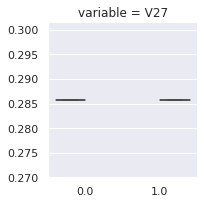

Dataset 3


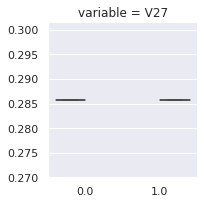

*****************
*****************
Feature V309
Dataset 0


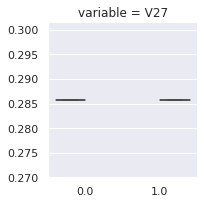

Dataset 1


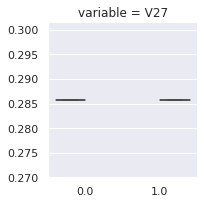

Dataset 2


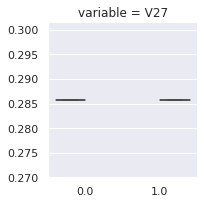

Dataset 3


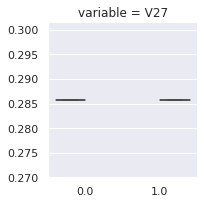

*****************
*****************
Feature V310
Dataset 0


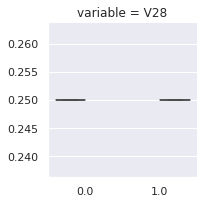

Dataset 1


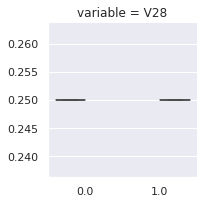

Dataset 2


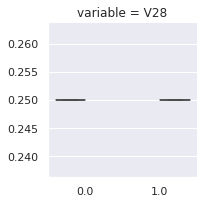

Dataset 3


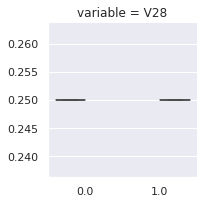

*****************
*****************
Feature V311
Dataset 0


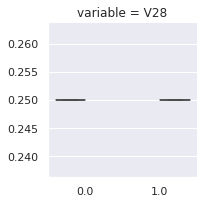

Dataset 1


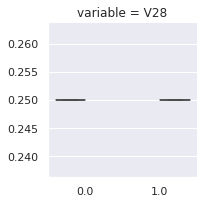

Dataset 2


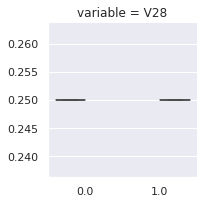

Dataset 3


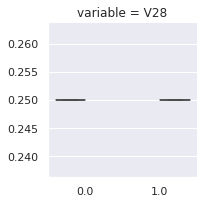

*****************
*****************
Feature V312
Dataset 0


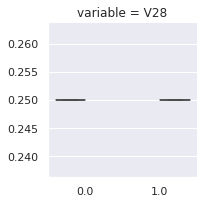

Dataset 1


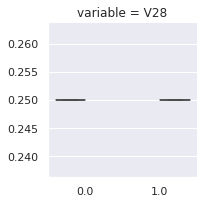

Dataset 2


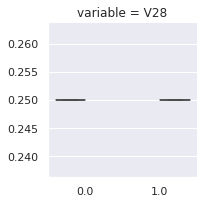

Dataset 3


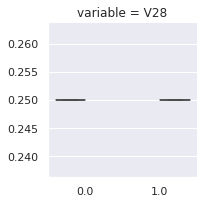

*****************
*****************
Feature V313
Dataset 0


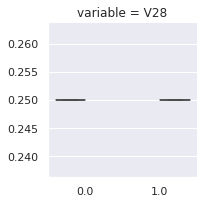

Dataset 1


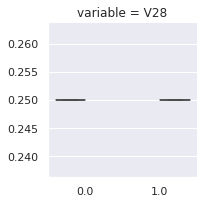

Dataset 2


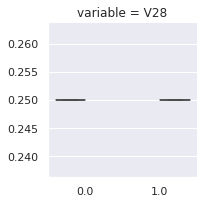

Dataset 3


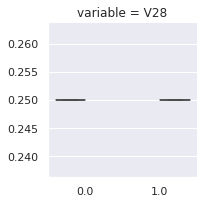

*****************
*****************
Feature V314
Dataset 0


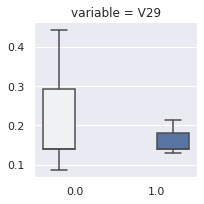

Dataset 1


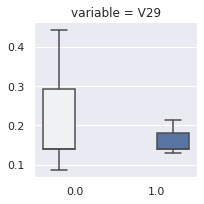

Dataset 2


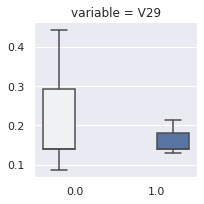

Dataset 3


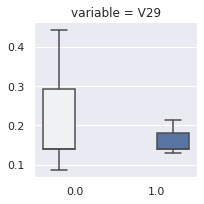

*****************
*****************
Feature V315
Dataset 0


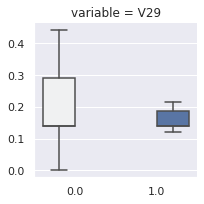

Dataset 1


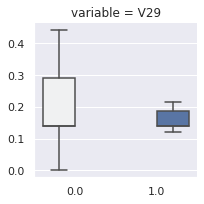

Dataset 2


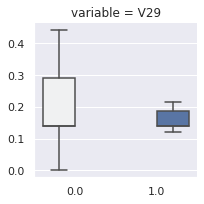

Dataset 3


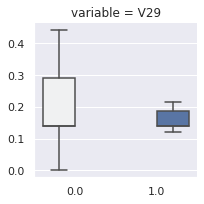

*****************
*****************
Feature V316
Dataset 0


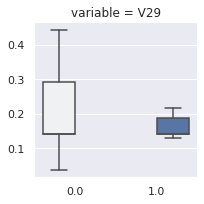

Dataset 1


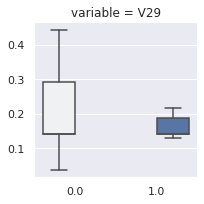

Dataset 2


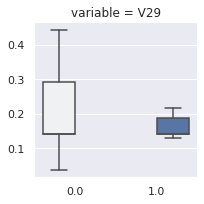

Dataset 3


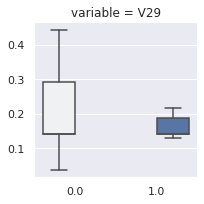

*****************
*****************
Feature V317
Dataset 0


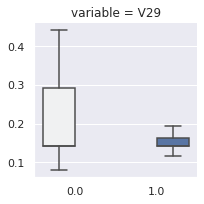

Dataset 1


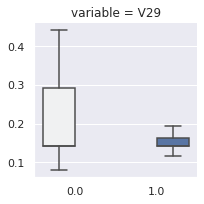

Dataset 2


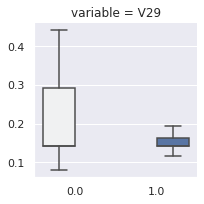

Dataset 3


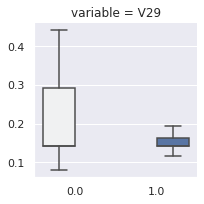

*****************
*****************
Feature V318
Dataset 0


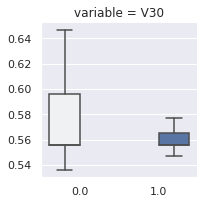

Dataset 1


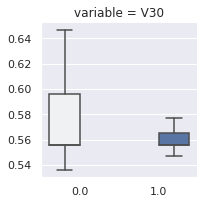

Dataset 2


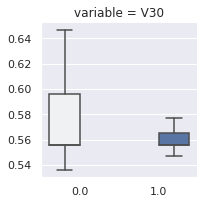

Dataset 3


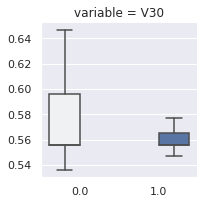

*****************
*****************
Feature V319
Dataset 0


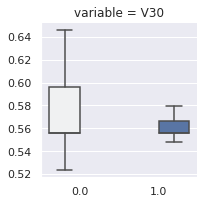

Dataset 1


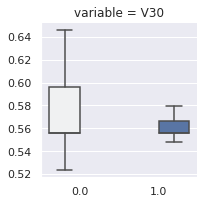

Dataset 2


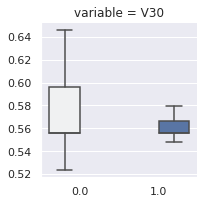

Dataset 3


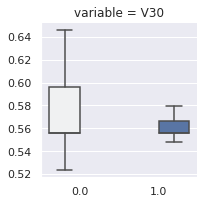

*****************
*****************
Feature V320
Dataset 0


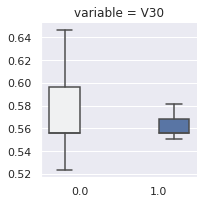

Dataset 1


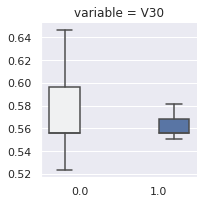

Dataset 2


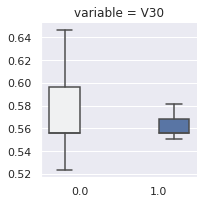

Dataset 3


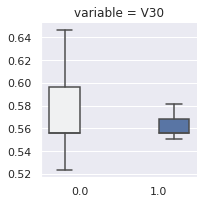

*****************
*****************
Feature V321
Dataset 0


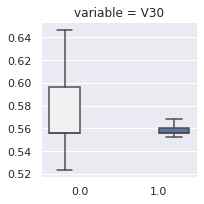

Dataset 1


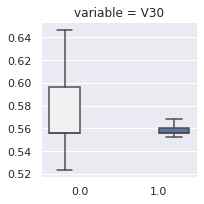

Dataset 2


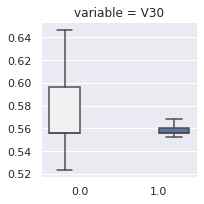

Dataset 3


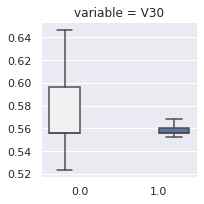

*****************
*****************
Feature os_version
Dataset 0


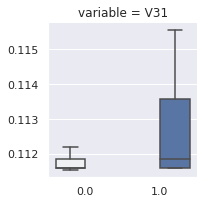

Dataset 1


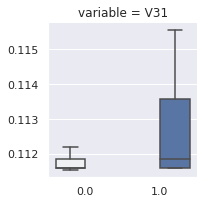

Dataset 2


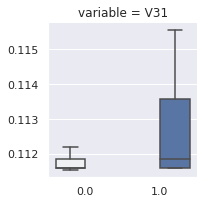

Dataset 3


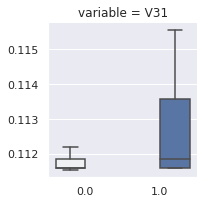

*****************
*****************
Feature browser_version
Dataset 0


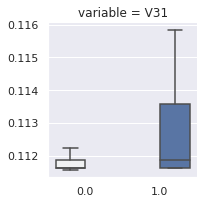

Dataset 1


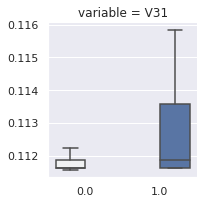

Dataset 2


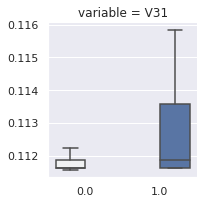

Dataset 3


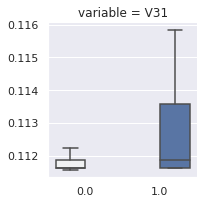

*****************
*****************
Feature screen_w
Dataset 0


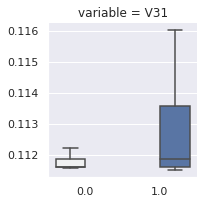

Dataset 1


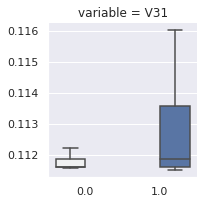

Dataset 2


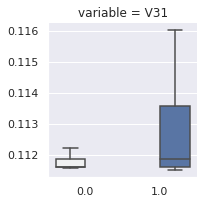

Dataset 3


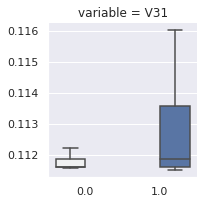

*****************
*****************
Feature screen_h
Dataset 0


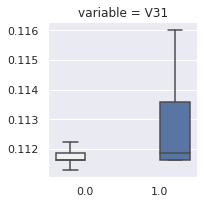

Dataset 1


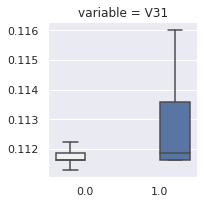

Dataset 2


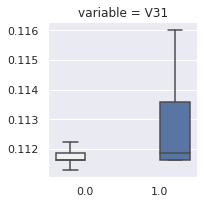

Dataset 3


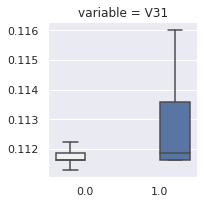

*****************
*****************
Feature day
Dataset 0


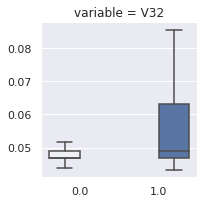

Dataset 1


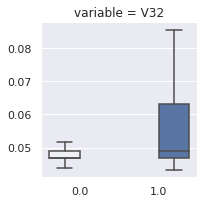

Dataset 2


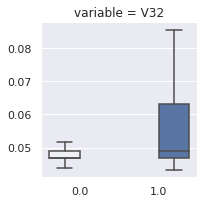

Dataset 3


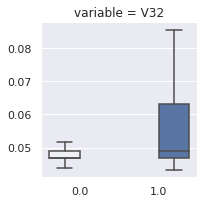

*****************
*****************
Feature hour
Dataset 0


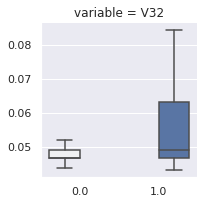

Dataset 1


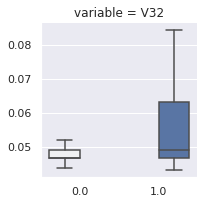

Dataset 2


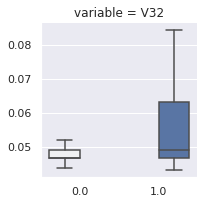

Dataset 3


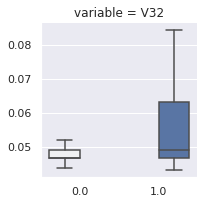

In [ ]:
melted = []
target_col = "isFraud"
for i in range(len(numerical_col)): 
  print('*****************')
  print('*****************')
  print('Feature', numerical_col[i])
  for j in dataset:
    print('Dataset', j+1)
    melted.append(dataset[j].melt(id_vars=target_col,value_vars=numerical_col[i]))
    g = sns.FacetGrid(melted[i], col='variable', sharex=False,col_wrap=1)
    g.map_dataframe(sns.boxplot, x="isFraud", y="value", showfliers=False, hue = 'isFraud')
    plt.show()